In [29]:
#Hilfscode zum finden meines Arbeitsverzeichnis und der vorhanden Dateien
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

input_dir = '/kaggle/input/'

for root, dirs, files in os.walk(input_dir):
    print(f"Verzeichnis: {root}")
    #print(f"Unterordner: {dirs}")
    #print(f"Dateien: {files}")
    print('---')


history_paths = [
    "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/model_GRU64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl",
    "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/model_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/model_1Hour_GRU64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl"
]

Aktuelles Arbeitsverzeichnis: /kaggle/working
Verzeichnis: /kaggle/input/
---
Verzeichnis: /kaggle/input/modelle
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128
---
Verzeichnis: /kaggle/input/modelle/model_LSTM64_gradclip_RedPl
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336
---
Verzeichnis: /kaggle/input/modelle/model_GRU64
---
Verzeichnis: /kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128
---
Verzeichnis: /kaggle/input/modelle/model_GRU64_gradclip_RedPl_seq672
---
Verzeichnis: /kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128
---
Verzeichnis: /kaggle/input/modelle/model_LSTM64
---
Verzeichnis: /kaggle/input/modelle/model_LSTM64_gradclip_RedPl_seq672
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336
---
Verzeichnis: /kaggle/input/modelle/model_GRU64_gradclip_RedPl
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128
---
Verzeic

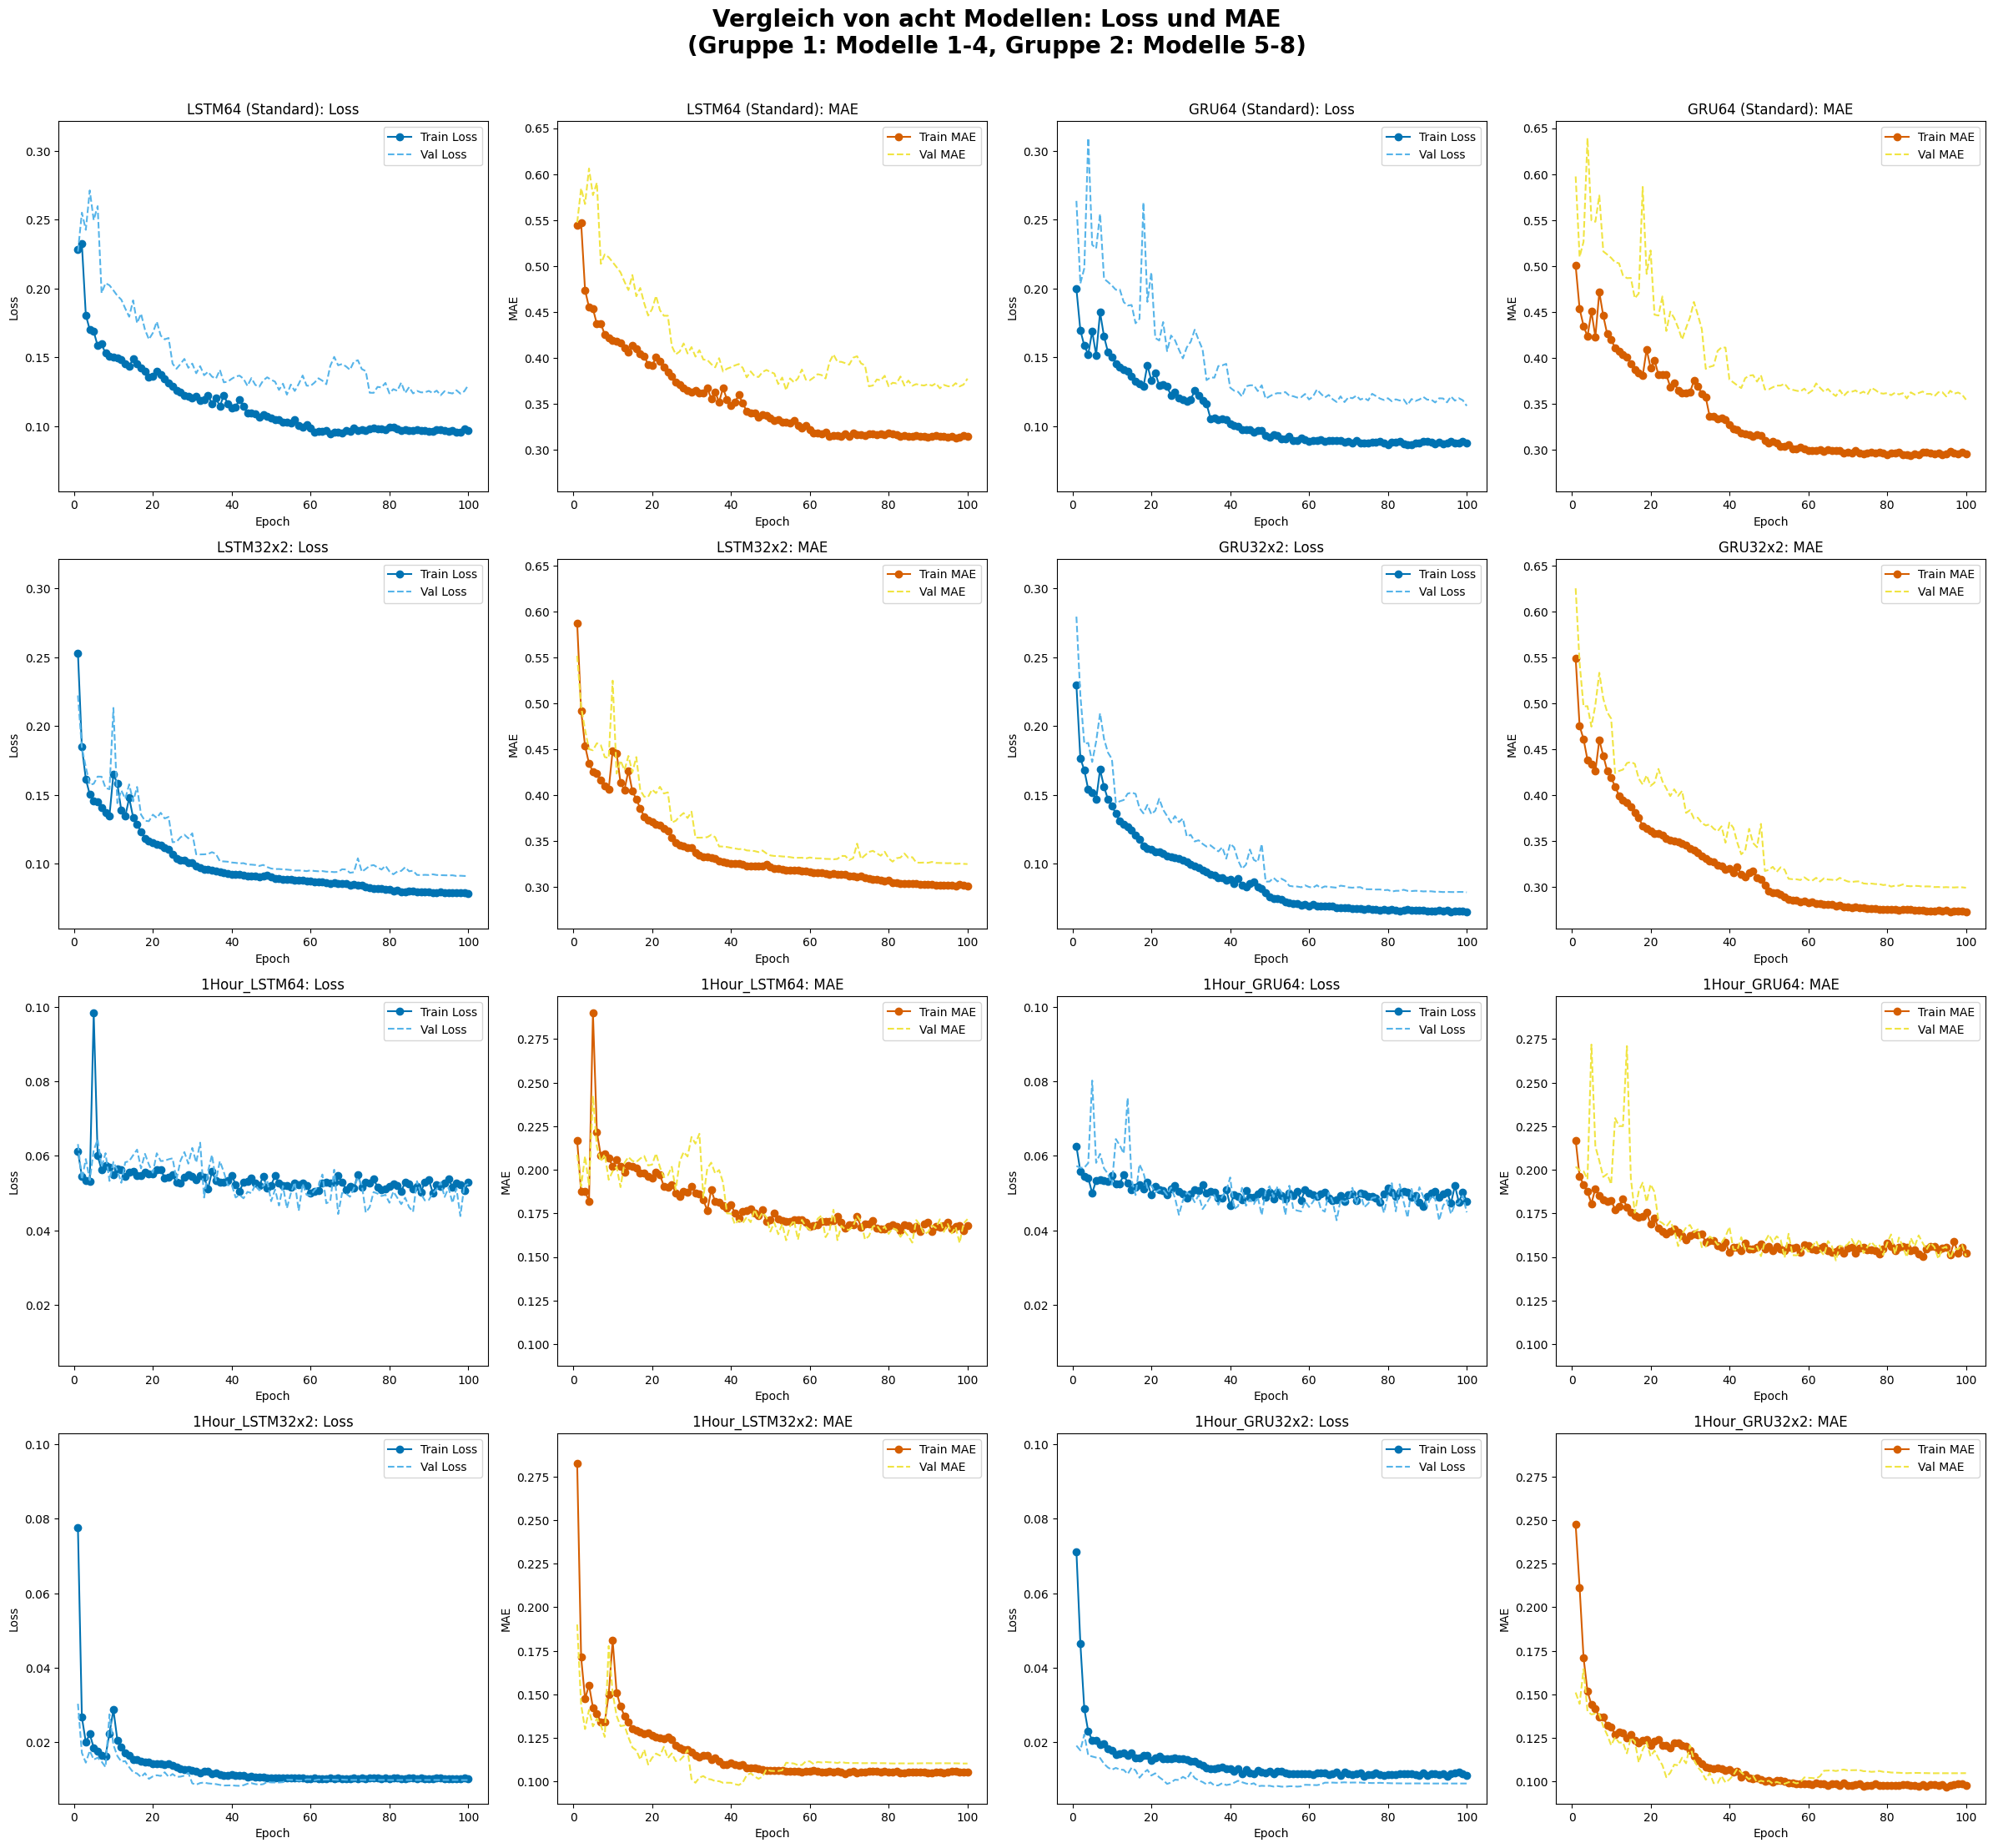

In [13]:
import matplotlib.pyplot as plt
import pickle

# Originale Dateipfade aus deinem Code
history_paths = [
    "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/model_GRU64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl",
    "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/model_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/model_1Hour_GRU64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl"
]
model_titles = [
    "LSTM64 (Standard)",
    "GRU64 (Standard)",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

# Farben für die Plots
color_train_loss = "#0072B2"
color_val_loss   = "#56B4E9"
color_train_mae  = "#D55E00"
color_val_mae    = "#F0E442"

# History laden
def load_history(path):
    with open(path, 'rb') as file:
        return pickle.load(file)
history_dicts = [load_history(p) for p in history_paths]

# Epochen bestimmen
epochs = [range(1, len(h["loss"]) + 1) for h in history_dicts]

# Gemeinsame y-Achsen-Skalierung pro Gruppe (1-4, 5-8)
def get_minmax(histories, key):
    values = []
    for h in histories:
        values.extend(h[key])
        values.extend(h[f"val_{key}"])
    min_v, max_v = min(values), max(values)
    margin = 0.05 * (max_v - min_v)
    return min_v - margin, max_v + margin

min_loss_1, max_loss_1 = get_minmax(history_dicts[:4], "loss")
min_mae_1,  max_mae_1  = get_minmax(history_dicts[:4], "mae")
min_loss_2, max_loss_2 = get_minmax(history_dicts[4:], "loss")
min_mae_2,  max_mae_2  = get_minmax(history_dicts[4:], "mae")

plt.figure(figsize=(24, 22))
for i in range(8):
    # Achsenbereich je nach Gruppe wählen
    if i < 4:
        min_loss, max_loss = min_loss_1, max_loss_1
        min_mae, max_mae   = min_mae_1,  max_mae_1
    else:
        min_loss, max_loss = min_loss_2, max_loss_2
        min_mae, max_mae   = min_mae_2,  max_mae_2

    # Loss-Plot
    plt.subplot(4, 4, 2*i + 1)
    plt.plot(epochs[i], history_dicts[i]["loss"], "o-", color=color_train_loss, label="Train Loss")
    plt.plot(epochs[i], history_dicts[i]["val_loss"], "--", color=color_val_loss, label="Val Loss")
    plt.title(f"{model_titles[i]}: Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(min_loss, max_loss)
    plt.legend()

    # MAE-Plot
    plt.subplot(4, 4, 2*i + 2)
    plt.plot(epochs[i], history_dicts[i]["mae"], "o-", color=color_train_mae, label="Train MAE")
    plt.plot(epochs[i], history_dicts[i]["val_mae"], "--", color=color_val_mae, label="Val MAE")
    plt.title(f"{model_titles[i]}: MAE")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.ylim(min_mae, max_mae)
    plt.legend()

plt.figtext(0.5, 0.98, "Vergleich von acht Modellen: Loss und MAE\n(Gruppe 1: Modelle 1-4, Gruppe 2: Modelle 5-8)", ha="center", fontsize=20, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


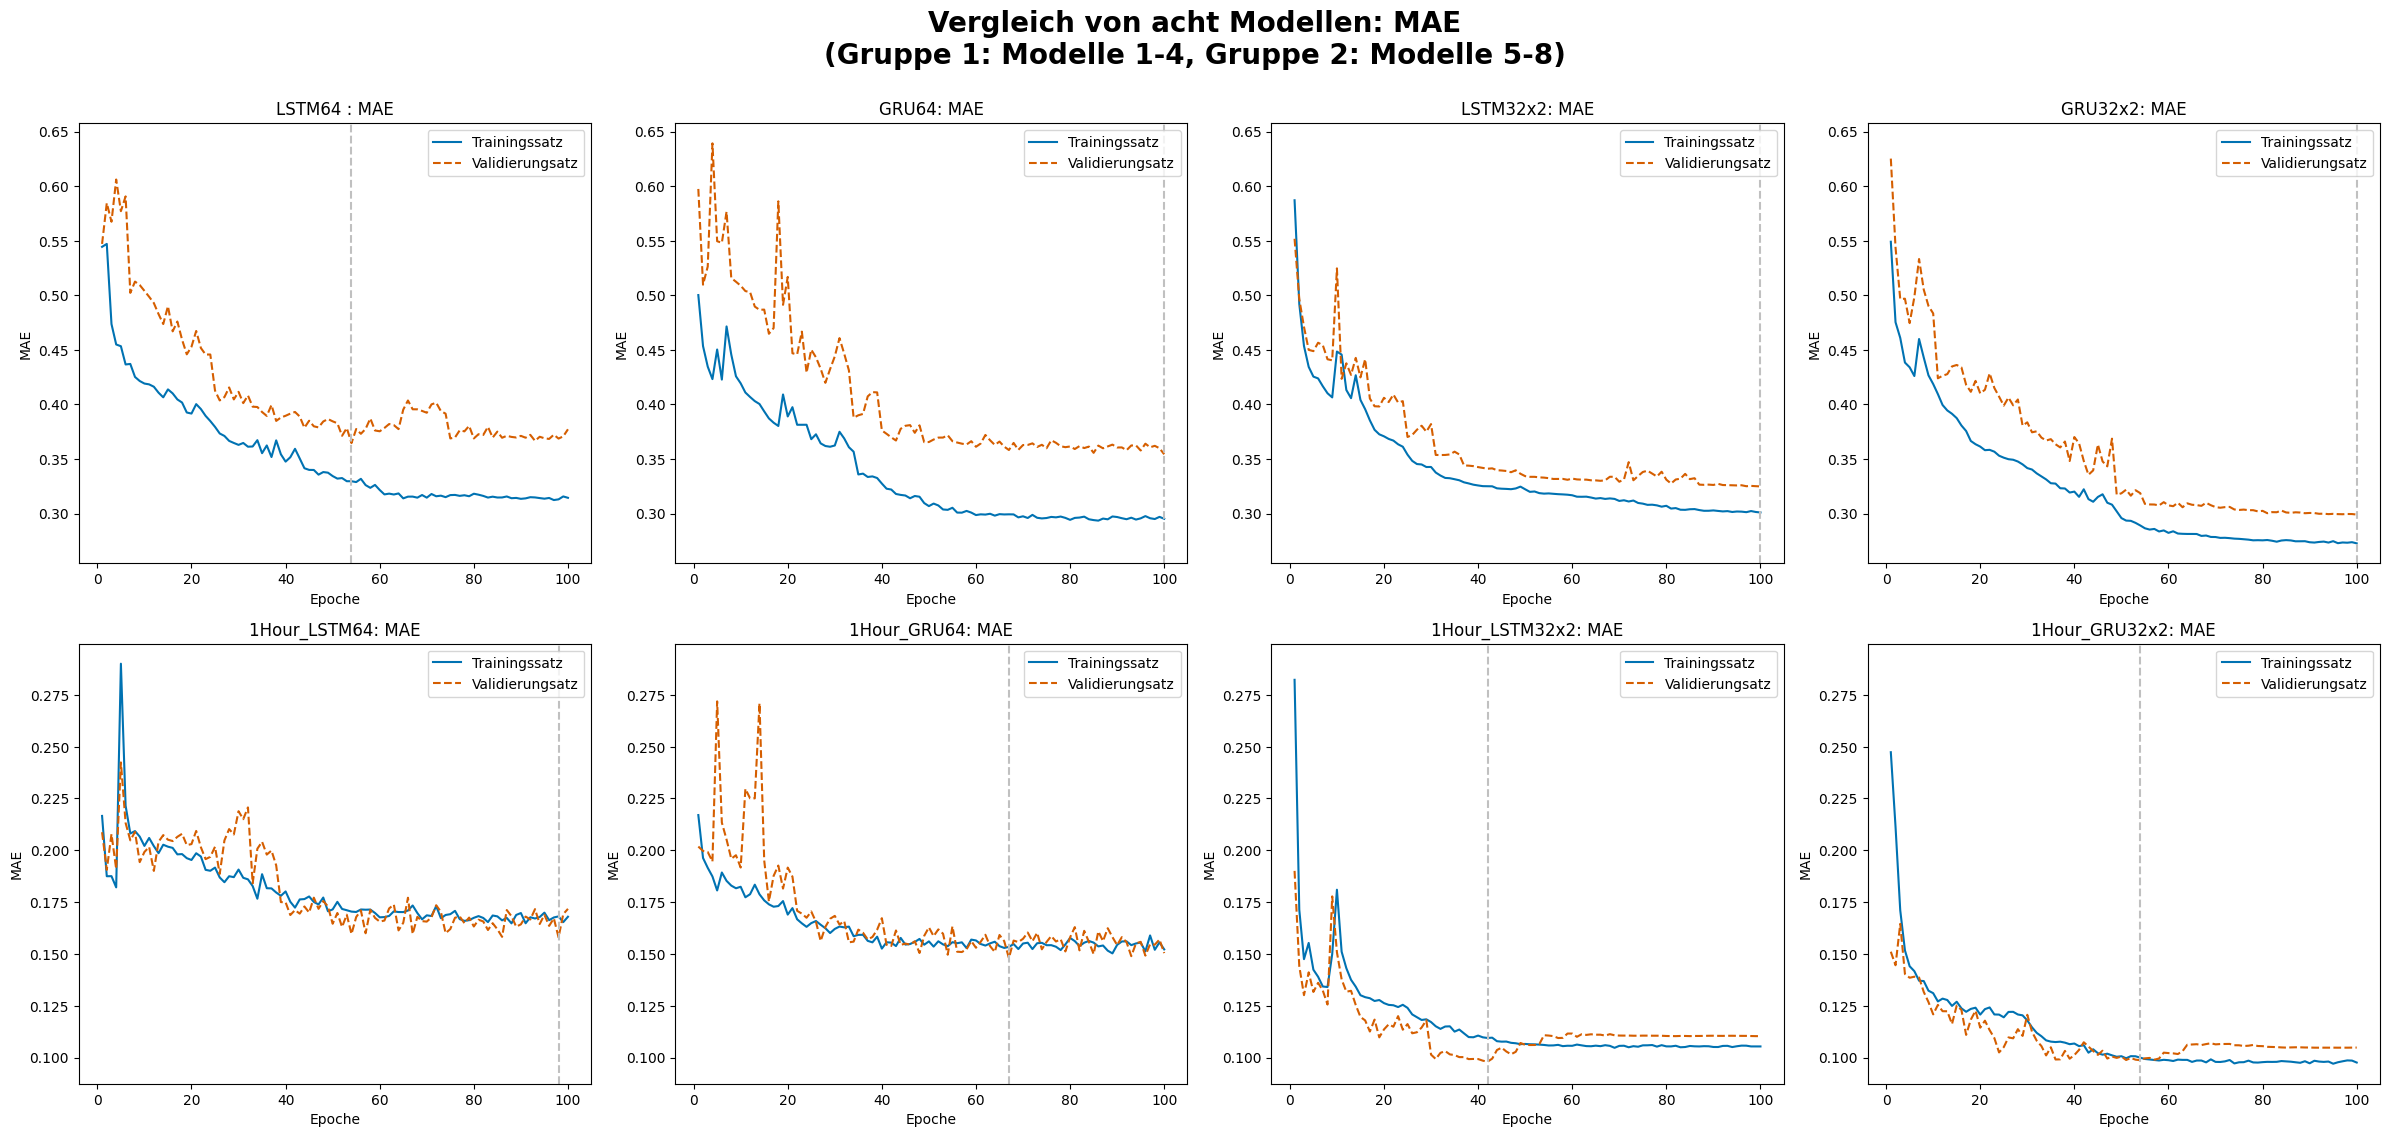

/kaggle/working/modelle_vergleich.png

In [14]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

config = {
    "rows": 2,
    "cols": 4,
    "filename": "modelle_vergleich.png",
    "min_val_mae_line_color": "#C0C0C0"
}

color_train_mae = "#0072B2"
color_val_mae   = "#D55E00"

history_paths = [
    "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/model_GRU64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl",
    "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/model_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/model_1Hour_GRU64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl"
]

model_titles = [
    "LSTM64 ",
    "GRU64",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    if not os.path.exists(path):
        print(f"❌ Datei nicht gefunden: {path}")
        return None
    with open(path, 'rb') as file:
        return pickle.load(file)

history_dicts = [load_history(p) for p in history_paths]

if any(h is None for h in history_dicts):
    print("Mindestens eine History-Datei konnte nicht geladen werden. Bitte prüfe die Pfade.")
else:
    epochs = [range(1, len(h["loss"]) + 1) for h in history_dicts]

    def get_minmax(histories):
        values = []
        for h in histories:
            values.extend(h["mae"])
            values.extend(h["val_mae"])
        min_v, max_v = min(values), max(values)
        margin = 0.05 * (max_v - min_v)
        return min_v - margin, max_v + margin

    min_mae_1, max_mae_1 = get_minmax(history_dicts[:4])
    min_mae_2, max_mae_2 = get_minmax(history_dicts[4:])

    plt.figure(figsize=(config["cols"]*6, config["rows"]*5.5))
    for i in range(8):
        if i < 4:
            min_mae, max_mae = min_mae_1, max_mae_1
        else:
            min_mae, max_mae = min_mae_2, max_mae_2

        val_mae = history_dicts[i]["val_mae"]
        min_idx = np.argmin(val_mae)
        min_epoch = list(epochs[i])[min_idx]

        plt.subplot(config["rows"], config["cols"], i + 1)
        plt.plot(epochs[i], history_dicts[i]["mae"], "-", color=color_train_mae, label="Trainingssatz")
        plt.plot(epochs[i], val_mae, "--", color=color_val_mae, label="Validierungsatz")
        plt.axvline(x=min_epoch, color=config["min_val_mae_line_color"], linestyle='--')
        plt.title(f"{model_titles[i]}: MAE")
        plt.xlabel("Epoche")
        plt.ylabel("MAE")
        plt.ylim(min_mae, max_mae)
        plt.legend(loc='upper right')

    plt.figtext(0.5, 0.98, "Vergleich von acht Modellen: MAE\n(Gruppe 1: Modelle 1-4, Gruppe 2: Modelle 5-8)", ha="center", fontsize=20, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(config["filename"], dpi=300, bbox_inches='tight')
    plt.show()
    from IPython.display import FileLink, display
    display(FileLink(config["filename"]))


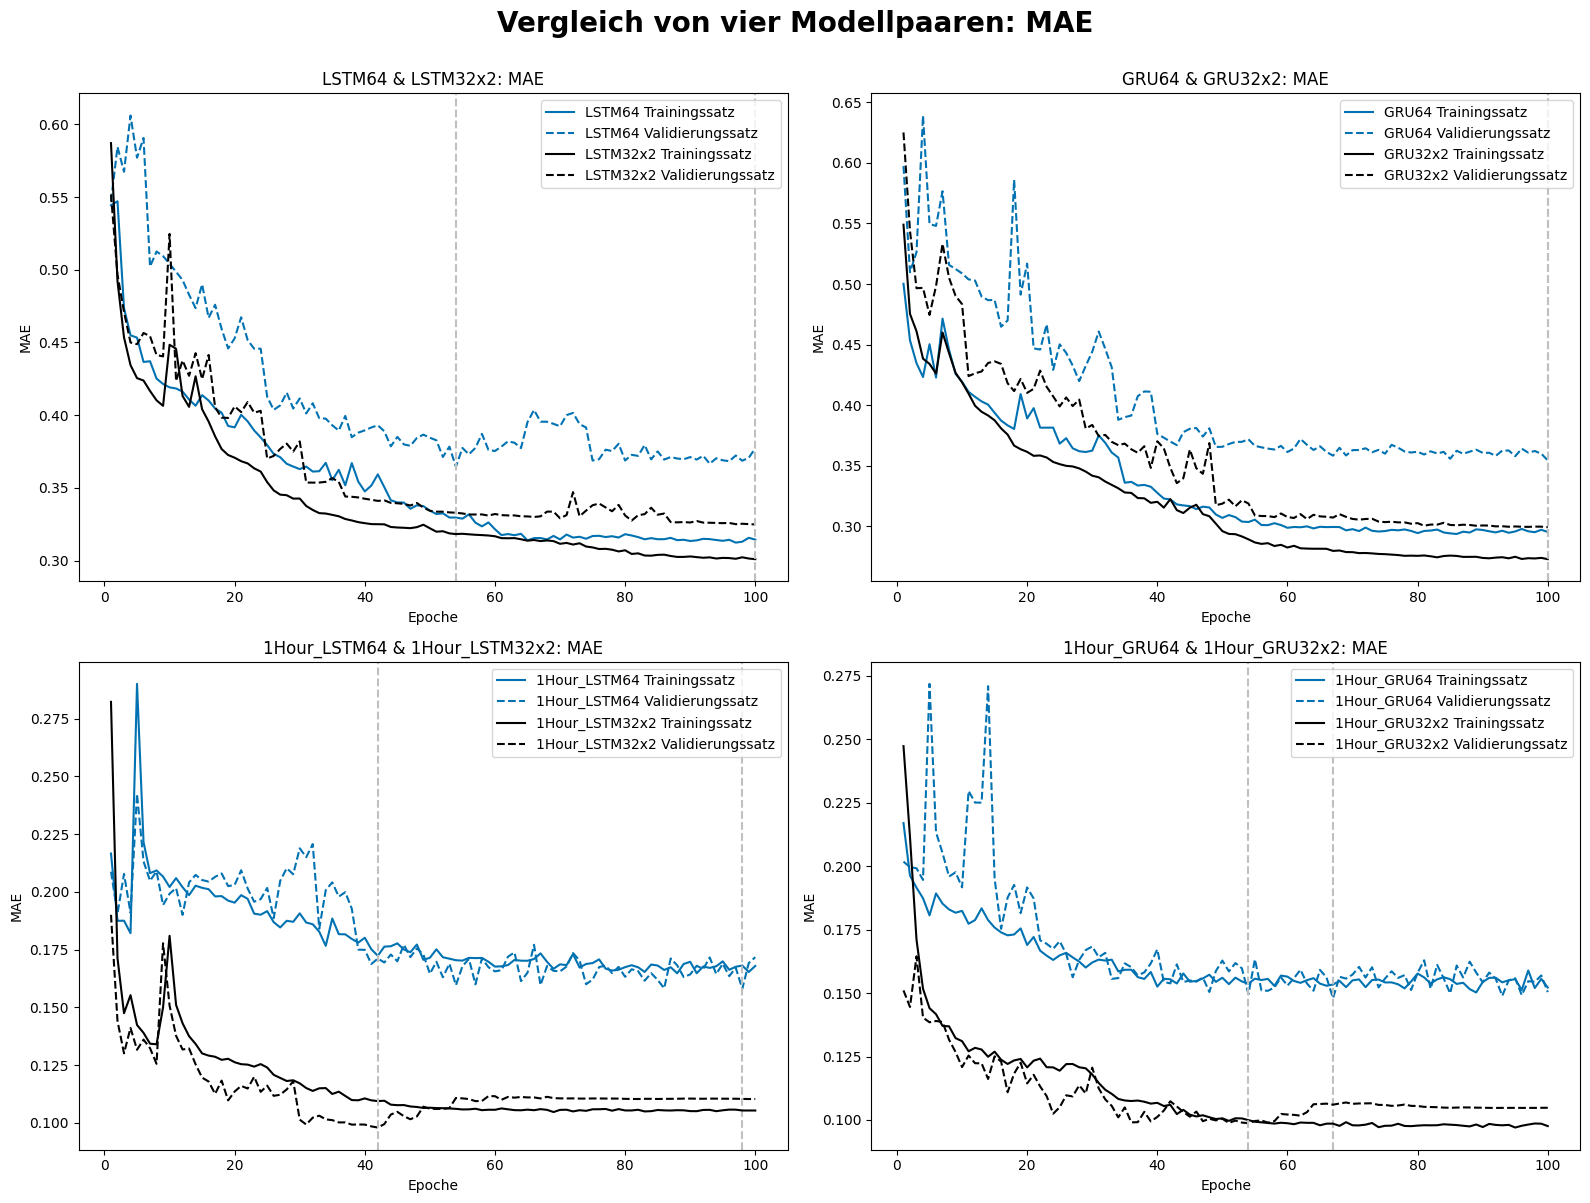

/kaggle/working/modelle_vergleich.png

In [15]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

config = {
    "rows": 2,
    "cols": 2,
    "filename": "modelle_vergleich.png",
    "min_val_mae_line_color": "#C0C0C0"
}

color_train_mae_1 = "#0072B2"   # Blau
color_val_mae_1   = "#0072B2"   
color_train_mae_2 = "#000000"   # Grün
color_val_mae_2   = "#000000"   

history_paths = [
    "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/model_GRU64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl",
    "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/model_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/model_1Hour_GRU64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl"
]

model_titles = [
    "LSTM64",
    "GRU64",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    if not os.path.exists(path):
        print(f"❌ Datei nicht gefunden: {path}")
        return None
    with open(path, 'rb') as file:
        return pickle.load(file)

history_dicts = [load_history(p) for p in history_paths]

if any(h is None for h in history_dicts):
    print("Mindestens eine History-Datei konnte nicht geladen werden. Bitte prüfe die Pfade.")
else:
    epochs = [range(1, len(h["loss"]) + 1) for h in history_dicts]

    def get_minmax(histories):
        values = []
        for h in histories:
            values.extend(h["mae"])
            values.extend(h["val_mae"])
        min_v, max_v = min(values), max(values)
        margin = 0.05 * (max_v - min_v)
        return min_v - margin, max_v + margin

    # Modellpaare wie gewünscht
    pairs = [
        (0, 2),  # LSTM64 (Standard) und LSTM32x2
        (1, 3),  # GRU64 (Standard) und GRU32x2
        (4, 6),  # 1Hour_LSTM64 und 1Hour_LSTM32x2
        (5, 7)   # 1Hour_GRU64 und 1Hour_GRU32x2
    ]

    plt.figure(figsize=(config["cols"]*8, config["rows"]*6))
    for i, (idx1, idx2) in enumerate(pairs):
        # Gemeinsame y-Achsen-Skalierung für die beiden Modelle in einem Plot
        min_mae = min(min(history_dicts[idx1]["mae"] + history_dicts[idx1]["val_mae"]),
                      min(history_dicts[idx2]["mae"] + history_dicts[idx2]["val_mae"]))
        max_mae = max(max(history_dicts[idx1]["mae"] + history_dicts[idx1]["val_mae"]),
                      max(history_dicts[idx2]["mae"] + history_dicts[idx2]["val_mae"]))
        margin = 0.05 * (max_mae - min_mae)
        min_mae -= margin
        max_mae += margin

        plt.subplot(config["rows"], config["cols"], i + 1)

        # Modell 1
        val_mae_1 = history_dicts[idx1]["val_mae"]
        min_idx_1 = np.argmin(val_mae_1)
        min_epoch_1 = list(epochs[idx1])[min_idx_1]
        plt.plot(epochs[idx1], history_dicts[idx1]["mae"], "-", color=color_train_mae_1, label=f"{model_titles[idx1]} Trainingssatz")
        plt.plot(epochs[idx1], val_mae_1, "--", color=color_val_mae_1, label=f"{model_titles[idx1]} Validierungssatz")
        plt.axvline(x=min_epoch_1, color=config["min_val_mae_line_color"], linestyle='--')

        # Modell 2
        val_mae_2 = history_dicts[idx2]["val_mae"]
        min_idx_2 = np.argmin(val_mae_2)
        min_epoch_2 = list(epochs[idx2])[min_idx_2]
        plt.plot(epochs[idx2], history_dicts[idx2]["mae"], "-", color=color_train_mae_2, label=f"{model_titles[idx2]} Trainingssatz")
        plt.plot(epochs[idx2], val_mae_2, "--", color=color_val_mae_2, label=f"{model_titles[idx2]} Validierungssatz")
        plt.axvline(x=min_epoch_2, color=config["min_val_mae_line_color"], linestyle='--')

        plt.title(f"{model_titles[idx1]} & {model_titles[idx2]}: MAE")
        plt.xlabel("Epoche")
        plt.ylabel("MAE")
        plt.ylim(min_mae, max_mae)
        plt.legend(loc='upper right')

    plt.figtext(0.5, 0.98, "Vergleich von vier Modellpaaren: MAE", ha="center", fontsize=20, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(config["filename"], dpi=300, bbox_inches='tight')
    plt.show()
    from IPython.display import FileLink, display
    display(FileLink(config["filename"]))


In [16]:
#nicht mehr nötig
import os
import pickle
import pandas as pd



model_titles = [
    "LSTM64",
    "GRU64",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]
def load_history(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

results = []
for title, path in zip(model_titles, history_paths):
    history = load_history(path)
    val_mae = history["val_mae"]
    val_loss = history["val_loss"]
    train_mae = history["mae"]
    train_loss = history["loss"]
    best_epoch_idx = val_mae.index(min(val_mae)) + 1  # +1, da Epochen bei 1 starten
    mae_str = f"{train_mae[best_epoch_idx - 1]:.4f} / {min(val_mae):.4f}"
    loss_str = f"{train_loss[best_epoch_idx - 1]:.4f} / {val_loss[best_epoch_idx - 1]:.4f}"
    results.append({
        "Modell": title,
        "Beste Epoche": best_epoch_idx,
        "Train_MAE / Val_MAE": mae_str,
        "Train_Loss / Val_Loss": loss_str
    })

df_results = pd.DataFrame(results)
print(df_results.to_markdown(index=False))

| Modell         |   Beste Epoche | Train_MAE / Val_MAE   | Train_Loss / Val_Loss   |
|:---------------|---------------:|:----------------------|:------------------------|
| LSTM64         |             54 | 0.3297 / 0.3646       | 0.1028 / 0.1230         |
| GRU64          |            100 | 0.2952 / 0.3543       | 0.0878 / 0.1148         |
| LSTM32x2       |            100 | 0.3010 / 0.3249       | 0.0785 / 0.0910         |
| GRU32x2        |            100 | 0.2727 / 0.2991       | 0.0649 / 0.0792         |
| 1Hour_LSTM64   |             98 | 0.1681 / 0.1580       | 0.0524 / 0.0438         |
| 1Hour_GRU64    |             67 | 0.1534 / 0.1480       | 0.0483 / 0.0427         |
| 1Hour_LSTM32x2 |             42 | 0.1094 / 0.0980       | 0.0111 / 0.0083         |
| 1Hour_GRU32x2  |             54 | 0.0999 / 0.0987       | 0.0119 / 0.0081         |


In [17]:
import os
import pickle
import pandas as pd

model_titles = [
    "LSTM64",
    "GRU64",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

results = []
for title, path in zip(model_titles, history_paths):
    history = load_history(path)
    val_mae = history["val_mae"]
    train_mae = history["mae"]
    best_epoch_idx = val_mae.index(min(val_mae)) + 1
    train_mae_best = train_mae[best_epoch_idx - 1]
    val_mae_best = min(val_mae)
    results.append({
        "Modell": title,
        "Beste Epoche": best_epoch_idx,
        "Train_MAE": f"{train_mae_best:.4f}/",
        "Val_MAE": f"{val_mae_best:.4f}/"
    })

df = pd.DataFrame(results)

pairs = [
    ("LSTM64", "GRU64"),
    ("LSTM32x2", "GRU32x2"),
    ("1Hour_LSTM64", "1Hour_GRU64"),
    ("1Hour_LSTM32x2", "1Hour_GRU32x2")
]

paired_results = []
for model1, model2 in pairs:
    row1 = df[df["Modell"] == model1].iloc[0]
    row2 = df[df["Modell"] == model2].iloc[0]
    paired_results.append({
        "Modell": f"{model1} / {model2}",
        "Beste Epoche": f"{row1['Beste Epoche']}/{row2['Beste Epoche']}",
        "Train_MAE": f"{row1['Train_MAE'][:-1]} {row2['Train_MAE'][:-1]}",
        "Val_MAE": f"{row1['Val_MAE'][:-1]} {row2['Val_MAE'][:-1]}"
    })

paired_df = pd.DataFrame(paired_results)

# Manuelle Markdown-Ausgabe mit zweiter Kopfzeile
header1 = "| Modell                         | Beste Epoche  | Train_MAE       | Val_MAE         |"
header3 = "|:-------------------------------|:--------------|:----------------|:----------------|"
header2 = "|                                |               | LSTM / GRU      | LSTM / GRU      |"

print(header1)
print(header2)
print(header3)
for _, row in paired_df.iterrows():
    print(f"| {row['Modell']:<30} | {row['Beste Epoche']:<13} | {row['Train_MAE']:<15} | {row['Val_MAE']:<15} |")


| Modell                         | Beste Epoche  | Train_MAE       | Val_MAE         |
|                                |               | LSTM / GRU      | LSTM / GRU      |
|:-------------------------------|:--------------|:----------------|:----------------|
| LSTM64 / GRU64                 | 54/100        | 0.3297 0.2952   | 0.3646 0.3543   |
| LSTM32x2 / GRU32x2             | 100/100       | 0.3010 0.2727   | 0.3249 0.2991   |
| 1Hour_LSTM64 / 1Hour_GRU64     | 98/67         | 0.1681 0.1534   | 0.1580 0.1480   |
| 1Hour_LSTM32x2 / 1Hour_GRU32x2 | 42/54         | 0.1094 0.0999   | 0.0980 0.0987   |


In [18]:
import os
import pickle
import pandas as pd

model_titles = [
    "LSTM64",
    "GRU64", 
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

# Lade die Ergebnisse
results = []
for title, path in zip(model_titles, history_paths):
    history = load_history(path)
    val_mae = history["val_mae"]
    train_mae = history["mae"]
    best_epoch_idx = val_mae.index(min(val_mae)) + 1
    train_mae_best = train_mae[best_epoch_idx - 1]
    val_mae_best = min(val_mae)
    results.append({
        "Modell": title,
        "Beste Epoche": best_epoch_idx,
        "Train_MAE": f"{train_mae_best:.4f}",
        "Val_MAE": f"{val_mae_best:.4f}"
    })

df = pd.DataFrame(results)

# Erstelle gepaarte Vergleiche
pairs = [
    ("LSTM64", "GRU64"),
    ("LSTM32x2", "GRU32x2"),
    ("1Hour_LSTM64", "1Hour_GRU64"),
    ("1Hour_LSTM32x2", "1Hour_GRU32x2")
]

paired_results = []
for model1, model2 in pairs:
    row1 = df[df["Modell"] == model1].iloc[0]
    row2 = df[df["Modell"] == model2].iloc[0]
    paired_results.append({
        "Modell": f"{model1} / {model2}",
        "Beste Epoche": f"{row1['Beste Epoche']}/{row2['Beste Epoche']}",
        "Train_MAE": f"{row1['Train_MAE']} / {row2['Train_MAE']}",
        "Val_MAE": f"{row1['Val_MAE']} / {row2['Val_MAE']}"
    })

paired_df = pd.DataFrame(paired_results)

# Schönere Tabellen-Ausgabe
def print_comparison_table(df):
    print("## Modell-Vergleich: LSTM vs GRU")
    print()
    
    # Header mit Unterzeilen
    print("| Modell | Beste Epoche | Train MAE | Val MAE |")
    print("|        |              | LSTM / GRU | LSTM / GRU |")
    print("|:-------|:-------------|:-----------|:-----------|")
    
    # Datenzeilen
    for _, row in df.iterrows():
        modell = row['Modell'].replace(' / ', ' vs ')
        print(f"| {modell:<30} | {row['Beste Epoche']:<12} | {row['Train_MAE']:<18} | {row['Val_MAE']:<18} |")

# Alternative: Pandas-Styling verwenden
def create_styled_table(df):
    # Erstelle eine saubere Kopie für die Anzeige
    display_df = df.copy()
    display_df['Modell'] = display_df['Modell'].str.replace(' / ', ' vs ')
    
    # Verwende pandas to_markdown für bessere Formatierung
    if hasattr(display_df, 'to_markdown'):
        print("## Modell-Vergleich: LSTM vs GRU")
        print()
        print(display_df.to_markdown(index=False, tablefmt='grid'))
    else:
        print_comparison_table(df)

# Ausgabe
print_comparison_table(paired_df)


## Modell-Vergleich: LSTM vs GRU

| Modell | Beste Epoche | Train MAE | Val MAE |
|        |              | LSTM / GRU | LSTM / GRU |
|:-------|:-------------|:-----------|:-----------|
| LSTM64 vs GRU64                | 54/100       | 0.3297 / 0.2952    | 0.3646 / 0.3543    |
| LSTM32x2 vs GRU32x2            | 100/100      | 0.3010 / 0.2727    | 0.3249 / 0.2991    |
| 1Hour_LSTM64 vs 1Hour_GRU64    | 98/67        | 0.1681 / 0.1534    | 0.1580 / 0.1480    |
| 1Hour_LSTM32x2 vs 1Hour_GRU32x2 | 42/54        | 0.1094 / 0.0999    | 0.0980 / 0.0987    |


In [19]:
import os
import pickle
import pandas as pd

model_titles = [
    "LSTM64",
    "GRU64", 
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

# Lade die Ergebnisse
results = []
for title, path in zip(model_titles, history_paths):
    history = load_history(path)
    val_mae = history["val_mae"]
    train_mae = history["mae"]
    best_epoch_idx = val_mae.index(min(val_mae)) + 1
    train_mae_best = train_mae[best_epoch_idx - 1]
    val_mae_best = min(val_mae)
    results.append({
        "Modell": title,
        "Beste Epoche": best_epoch_idx,
        "Train_MAE": f"{train_mae_best:.4f}",
        "Val_MAE": f"{val_mae_best:.4f}"
    })

df = pd.DataFrame(results)

# Erstelle gepaarte Vergleiche
pairs = [
    ("LSTM64", "GRU64"),
    ("LSTM32x2", "GRU32x2"),
    ("1Hour_LSTM64", "1Hour_GRU64"),
    ("1Hour_LSTM32x2", "1Hour_GRU32x2")
]

paired_results = []
for model1, model2 in pairs:
    row1 = df[df["Modell"] == model1].iloc[0]
    row2 = df[df["Modell"] == model2].iloc[0]
    paired_results.append({
        "Modell": f"{model1} / {model2}",
        "Beste Epoche": f"{row1['Beste Epoche']}/{row2['Beste Epoche']}",
        "Train_MAE": f"{row1['Train_MAE']} / {row2['Train_MAE']}",
        "Val_MAE": f"{row1['Val_MAE']} / {row2['Val_MAE']}"
    })

paired_df = pd.DataFrame(paired_results)

# Schönere Tabellen-Ausgabe mit Zentrierung und leerer Zeile
def print_comparison_table(df):
    print("Modell-Vergleich: LSTM vs GRU")
    print()
    
    # Spaltenbreiten definieren
    col_widths = {
        "Modell": 32,
        "Beste Epoche": 15,
        "Train_MAE": 20,
        "Val_MAE": 20
    }
    
    # Header mit Unterzeilen (zentriert)
    header1 = f"|{'Modell'.center(col_widths['Modell'])}|{'Epoche'.center(col_widths['Beste Epoche'])}|{'Train MAE'.center(col_widths['Train_MAE'])}|{'Val MAE'.center(col_widths['Val_MAE'])}|"
    header2 = f"|{' '.center(col_widths['Modell'])}|{'LSTM / GRU'.center(col_widths['Beste Epoche'])}|{'LSTM / GRU'.center(col_widths['Train_MAE'])}|{'LSTM / GRU'.center(col_widths['Val_MAE'])}|"
    separator = f"|{'-'*col_widths['Modell']}|{'-'*col_widths['Beste Epoche']}|{'-'*col_widths['Train_MAE']}|{'-'*col_widths['Val_MAE']}|"
    
    print(header1)
    print(header2)
    print(separator)
    
    # Datenzeilen (zentriert)
    for i, (_, row) in enumerate(df.iterrows()):
        modell = row['Modell'].replace(' / ', ' vs ')
        data_line = f"|{modell.center(col_widths['Modell'])}|{row['Beste Epoche'].center(col_widths['Beste Epoche'])}|{row['Train_MAE'].center(col_widths['Train_MAE'])}|{row['Val_MAE'].center(col_widths['Val_MAE'])}|"
        print(data_line)
        
        # Leere Zeile nach der zweiten Reihe (Index 1 = LSTM32x2 vs GRU32x2)
        if i == 1:
            empty_line = f"|{' '.center(col_widths['Modell'])}|{' '.center(col_widths['Beste Epoche'])}|{' '.center(col_widths['Train_MAE'])}|{' '.center(col_widths['Val_MAE'])}|"
            print(empty_line)

# Ausgabe
print_comparison_table(paired_df)


Modell-Vergleich: LSTM vs GRU

|             Modell             |     Epoche    |     Train MAE      |      Val MAE       |
|                                |   LSTM / GRU  |     LSTM / GRU     |     LSTM / GRU     |
|--------------------------------|---------------|--------------------|--------------------|
|        LSTM64 vs GRU64         |     54/100    |  0.3297 / 0.2952   |  0.3646 / 0.3543   |
|      LSTM32x2 vs GRU32x2       |    100/100    |  0.3010 / 0.2727   |  0.3249 / 0.2991   |
|                                |               |                    |                    |
|  1Hour_LSTM64 vs 1Hour_GRU64   |     98/67     |  0.1681 / 0.1534   |  0.1580 / 0.1480   |
|1Hour_LSTM32x2 vs 1Hour_GRU32x2 |     42/54     |  0.1094 / 0.0999   |  0.0980 / 0.0987   |


In [20]:
import os
import pickle
import pandas as pd

model_titles = [
    "LSTM64",
    "GRU64", 
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

# Lade die Ergebnisse
results = []
for title, path in zip(model_titles, history_paths):
    history = load_history(path)
    val_mae = history["val_mae"]
    train_mae = history["mae"]
    best_epoch_idx = val_mae.index(min(val_mae)) + 1
    train_mae_best = train_mae[best_epoch_idx - 1]
    val_mae_best = min(val_mae)
    results.append({
        "Modell": title,
        "Beste Epoche": best_epoch_idx,
        "Train_MAE": f"{train_mae_best:.4f}",
        "Val_MAE": f"{val_mae_best:.4f}"
    })

df = pd.DataFrame(results)

# Erstelle gepaarte Vergleiche
pairs = [
    ("LSTM64", "GRU64"),
    ("LSTM32x2", "GRU32x2"),
    ("1Hour_LSTM64", "1Hour_GRU64"),
    ("1Hour_LSTM32x2", "1Hour_GRU32x2")
]

paired_results = []
for model1, model2 in pairs:
    row1 = df[df["Modell"] == model1].iloc[0]
    row2 = df[df["Modell"] == model2].iloc[0]
    paired_results.append({
        "Modell": f"{model1} / {model2}",
        "Beste Epoche": f"{row1['Beste Epoche']}/{row2['Beste Epoche']}",
        "Train_MAE": f"{row1['Train_MAE']} / {row2['Train_MAE']}",
        "Val_MAE": f"{row1['Val_MAE']} / {row2['Val_MAE']}"
    })

paired_df = pd.DataFrame(paired_results)

# Schönere Tabellen-Ausgabe mit Zentrierung und leerer Zeile
def print_comparison_table(df):
    print("Modell-Vergleich: LSTM vs GRU")
    print()
    
    # Spaltenbreiten definieren
    col_widths = {
        "Modell": 32,
        "Beste Epoche": 15,
        "Train_MAE": 20,
        "Val_MAE": 20
    }
    
    # Header mit Unterzeilen (zentriert)
    header1 = f"|{'Modell'.center(col_widths['Modell'])}|{'Epoche'.center(col_widths['Beste Epoche'])}|{'Train MAE'.center(col_widths['Train_MAE'])}|{'Val MAE'.center(col_widths['Val_MAE'])}|"
    header2 = f"|{' '.center(col_widths['Modell'])}|{'LSTM / GRU'.center(col_widths['Beste Epoche'])}|{'LSTM / GRU'.center(col_widths['Train_MAE'])}|{'LSTM / GRU'.center(col_widths['Val_MAE'])}|"
    separator = f"|{'-'*col_widths['Modell']}|{'-'*col_widths['Beste Epoche']}|{'-'*col_widths['Train_MAE']}|{'-'*col_widths['Val_MAE']}|"
    
    print(header1)
    print(header2)
    print(separator)
    
    # Datenzeilen (zentriert)
    for i, (_, row) in enumerate(df.iterrows()):
        modell = row['Modell'].replace(' / ', ' vs ')
        data_line = f"|{modell.center(col_widths['Modell'])}|{row['Beste Epoche'].center(col_widths['Beste Epoche'])}|{row['Train_MAE'].center(col_widths['Train_MAE'])}|{row['Val_MAE'].center(col_widths['Val_MAE'])}|"
        print(data_line)
        
        # Leere Zeile nach der zweiten Reihe (Index 1 = LSTM32x2 vs GRU32x2)
        if i == 1:
            empty_line = f"|{' '.center(col_widths['Modell'])}|{' '.center(col_widths['Beste Epoche'])}|{' '.center(col_widths['Train_MAE'])}|{' '.center(col_widths['Val_MAE'])}|"
            print(empty_line)

# Ausgabe
print_comparison_table(paired_df)


Modell-Vergleich: LSTM vs GRU

|             Modell             |     Epoche    |     Train MAE      |      Val MAE       |
|                                |   LSTM / GRU  |     LSTM / GRU     |     LSTM / GRU     |
|--------------------------------|---------------|--------------------|--------------------|
|        LSTM64 vs GRU64         |     54/100    |  0.3297 / 0.2952   |  0.3646 / 0.3543   |
|      LSTM32x2 vs GRU32x2       |    100/100    |  0.3010 / 0.2727   |  0.3249 / 0.2991   |
|                                |               |                    |                    |
|  1Hour_LSTM64 vs 1Hour_GRU64   |     98/67     |  0.1681 / 0.1534   |  0.1580 / 0.1480   |
|1Hour_LSTM32x2 vs 1Hour_GRU32x2 |     42/54     |  0.1094 / 0.0999   |  0.0980 / 0.0987   |


# Modell

In [30]:
#Kaggle Import der Daten
import tensorflow as tf
import pandas as pd
import numpy as np

csv_path = "/kaggle/input/seminar-lstm/Gesamterzeugung_hourly.csv"
neu = pd.read_csv(csv_path, index_col='Datum', parse_dates=True)
print(f"🕐 Typ der ersten Spalte: {type(neu.iloc[1, 0])}")
display(neu.iloc[50000:50003])
neu.head(-3)

🕐 Typ der ersten Spalte: <class 'numpy.float64'>


Stromerzeugung Gesamt
Datum                                     
2020-09-14 09:00:00               15478.25
2020-09-14 10:00:00               16995.25
2020-09-14 11:00:00               17822.00

Stromerzeugung Gesamt
Datum                                     
2015-01-01 00:00:00               12884.25
2015-01-01 01:00:00               12552.00
2015-01-01 02:00:00               12394.50
2015-01-01 03:00:00               12112.50
2015-01-01 04:00:00               12042.50
...                                    ...
2025-05-23 16:00:00               15602.00
2025-05-23 17:00:00               14831.75
2025-05-23 18:00:00               13996.75
2025-05-23 19:00:00               12517.00
2025-05-23 20:00:00               11757.75

[91100 rows x 1 columns]

## 1 Layer 24h

In [31]:
import numpy as np
import pickle
import os

# Normalisierungsparameter aus dem ursprünglichen Training
Strom_train = neu["Stromerzeugung Gesamt"]["2015-01-01 00:00:00":"2018-06-30 23:00:00"]
Strom_valid =neu["Stromerzeugung Gesamt"]["2018-07-01 00:00:00":"2018-12-31 23:00:00"]
Strom_test =neu["Stromerzeugung Gesamt"]["2019-01-01 00:00:00":"2019-06-01 23:00:00"] 



mean = Strom_train.mean()
std = Strom_train.std()

# Normalisierte Datensätze erstellen
Strom_train_norm = (Strom_train - mean) / std
Strom_valid_norm = (Strom_valid - mean) / std
Strom_test_norm = (Strom_test - mean) / std


# Visuelle Darstellung

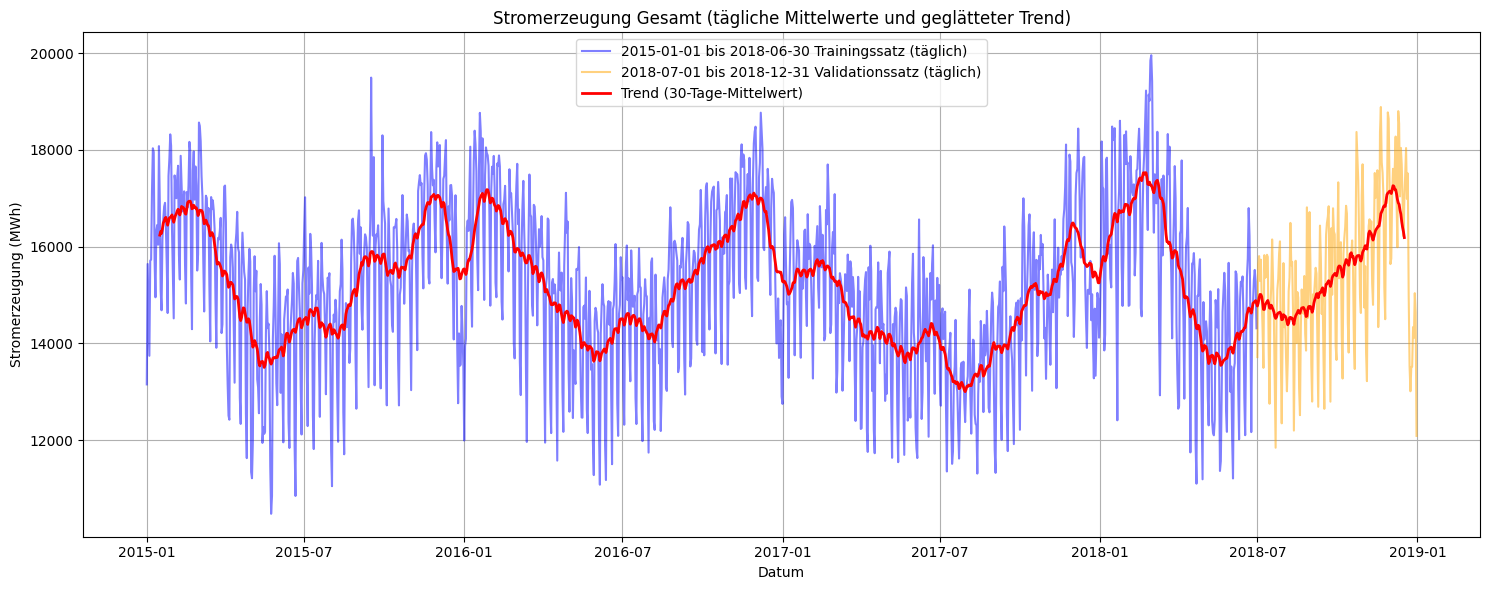

/kaggle/working/stromerzeugung_plot2.png

In [56]:
#Graphische Darstellung des Datensatz, kompletter Zeitraum. (verwendete Grafik 12 in Anhang)
#Mit täglichem Mittelwert der Stromerzeugung und Trendline 30Tage Mittelwert
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

file_path = 'stromerzeugung_plot2.png'

# Tägliche Mittelwerte berechnen
zeitraum1_tag = neu.loc['2015-01-01 00:00:00':'2018-06-30 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
zeitraum2_tag = neu.loc['2018-07-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
zeitraum3_tag = neu.loc['2015-01-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
# Rollierender Mittelwert (z.B. 30 Tage)
trend1 = zeitraum3_tag.rolling(window=30, center=True).mean()


# Plot erstellen
plt.figure(figsize=(15, 6))
plt.plot(zeitraum1_tag.index, zeitraum1_tag.values, label='2015-01-01 bis 2018-06-30 Trainingssatz (täglich)', color='blue', alpha=0.5)          #Testsatz war ein schlechter Name... Trainingssatz wäre klarer gewesen
plt.plot(zeitraum2_tag.index, zeitraum2_tag.values, label='2018-07-01 bis 2018-12-31 Validationssatz (täglich)', color='orange', alpha=0.5)
plt.plot(trend1.index, trend1.values, label='Trend (30-Tage-Mittelwert)', color='red', linewidth=2)
#plt.plot(trend2.index, trend2.values,  color='red', linewidth=2)
plt.title('Stromerzeugung Gesamt (tägliche Mittelwerte und geglätteter Trend)')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(file_path)
plt.show()

display(FileLink(file_path)) #Zum Downloaden als PNG

📁 Plot gespeichert unter: stromerzeugung_deutschland_2015_2018.png
📥 Download-Link:


/kaggle/working/stromerzeugung_deutschland_2015_2018.png

📊 Dateigröße: 1.16 MB


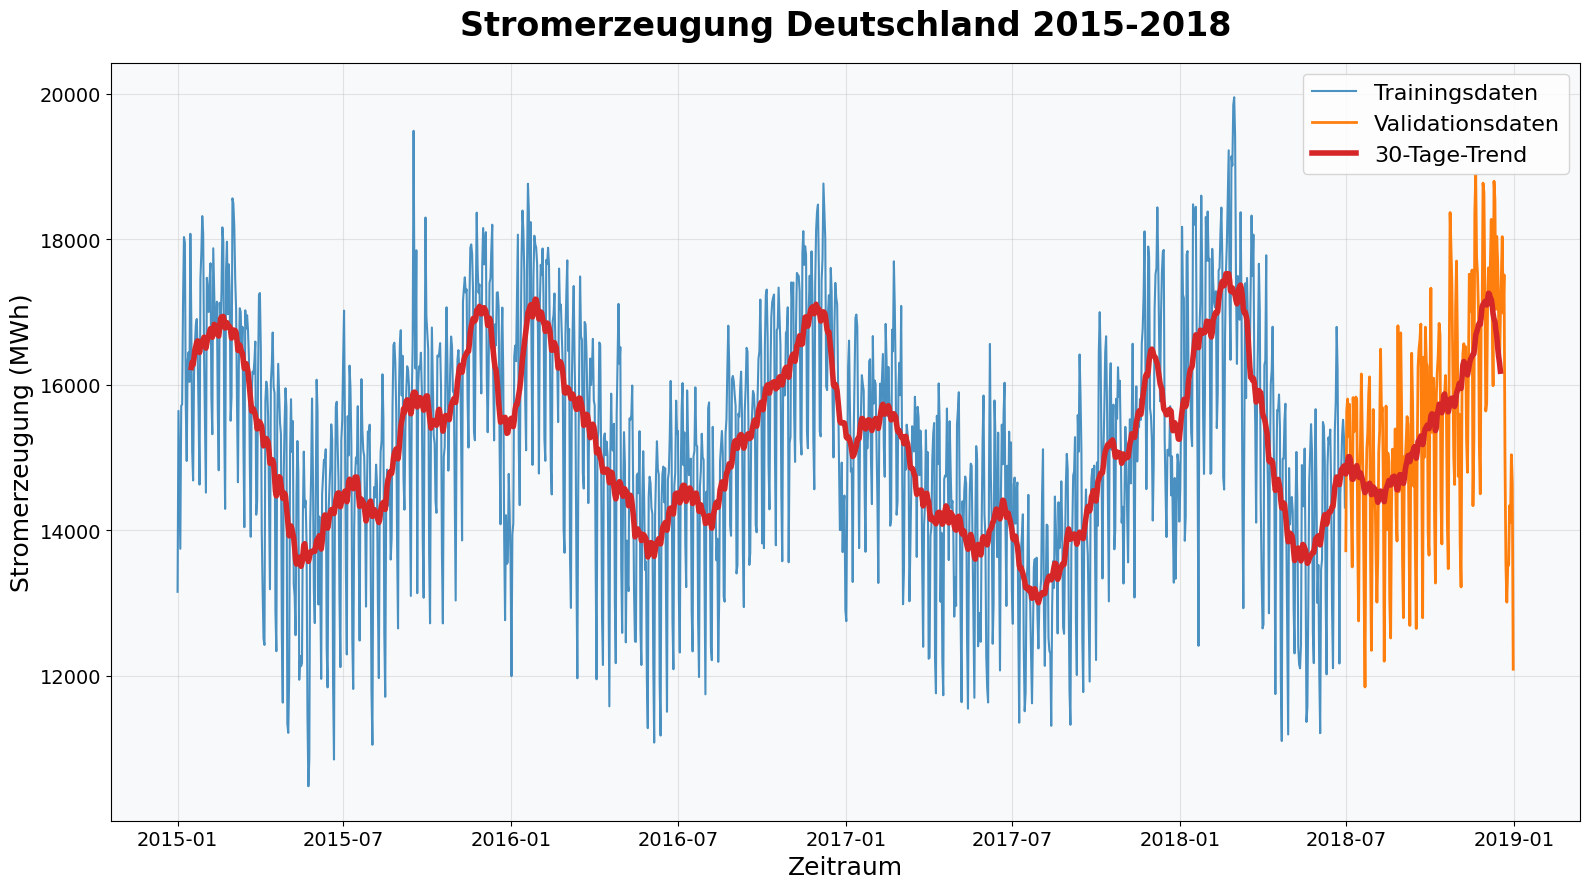

In [93]:
from IPython.display import FileLink, display

# Slide 1: Übersicht
fig, ax = plt.subplots(figsize=(16, 9))  # 16:9 Format für Präsentationen
ax.plot(zeitraum1_tag.index, zeitraum1_tag.values, color='#1f77b4', alpha=0.8, linewidth=1.5, label='Trainingsdaten')
ax.plot(zeitraum2_tag.index, zeitraum2_tag.values, color='#ff7f0e', linewidth=2, label='Validationsdaten')
ax.plot(trend1.index, trend1.values, color='#d62728', linewidth=4, label='30-Tage-Trend')

# Große, lesbare Schrift für Präsentation
ax.set_title('Stromerzeugung Deutschland 2015-2018', fontsize=24, fontweight='bold', pad=20)
ax.set_xlabel('Zeitraum', fontsize=18)
ax.set_ylabel('Stromerzeugung (MWh)', fontsize=18)
ax.legend(fontsize=16, loc='upper right')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=14)

# Hintergrundfarbe für bessere Sichtbarkeit
ax.set_facecolor('#f8f9fa')
plt.tight_layout()

# Plot speichern und Download-Link erstellen
file_path = 'stromerzeugung_deutschland_2015_2018.png'
fig.savefig(file_path, dpi=300, bbox_inches='tight', facecolor='white')

print(f"📁 Plot gespeichert unter: {file_path}")
print("📥 Download-Link:")
display(FileLink(file_path))

# Zusätzliche Informationen
import os
file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
print(f"📊 Dateigröße: {file_size:.2f} MB")

plt.show()


Validationsdatensatz: 2018-07-01 bis 2018-12-31 (komplett)
Anzeigefenster: 2018-08-01 bis 2018-08-21 (21 Tage)
24h-Trend: ✅ Aktiviert
30d-Trend: ✅ Aktiviert


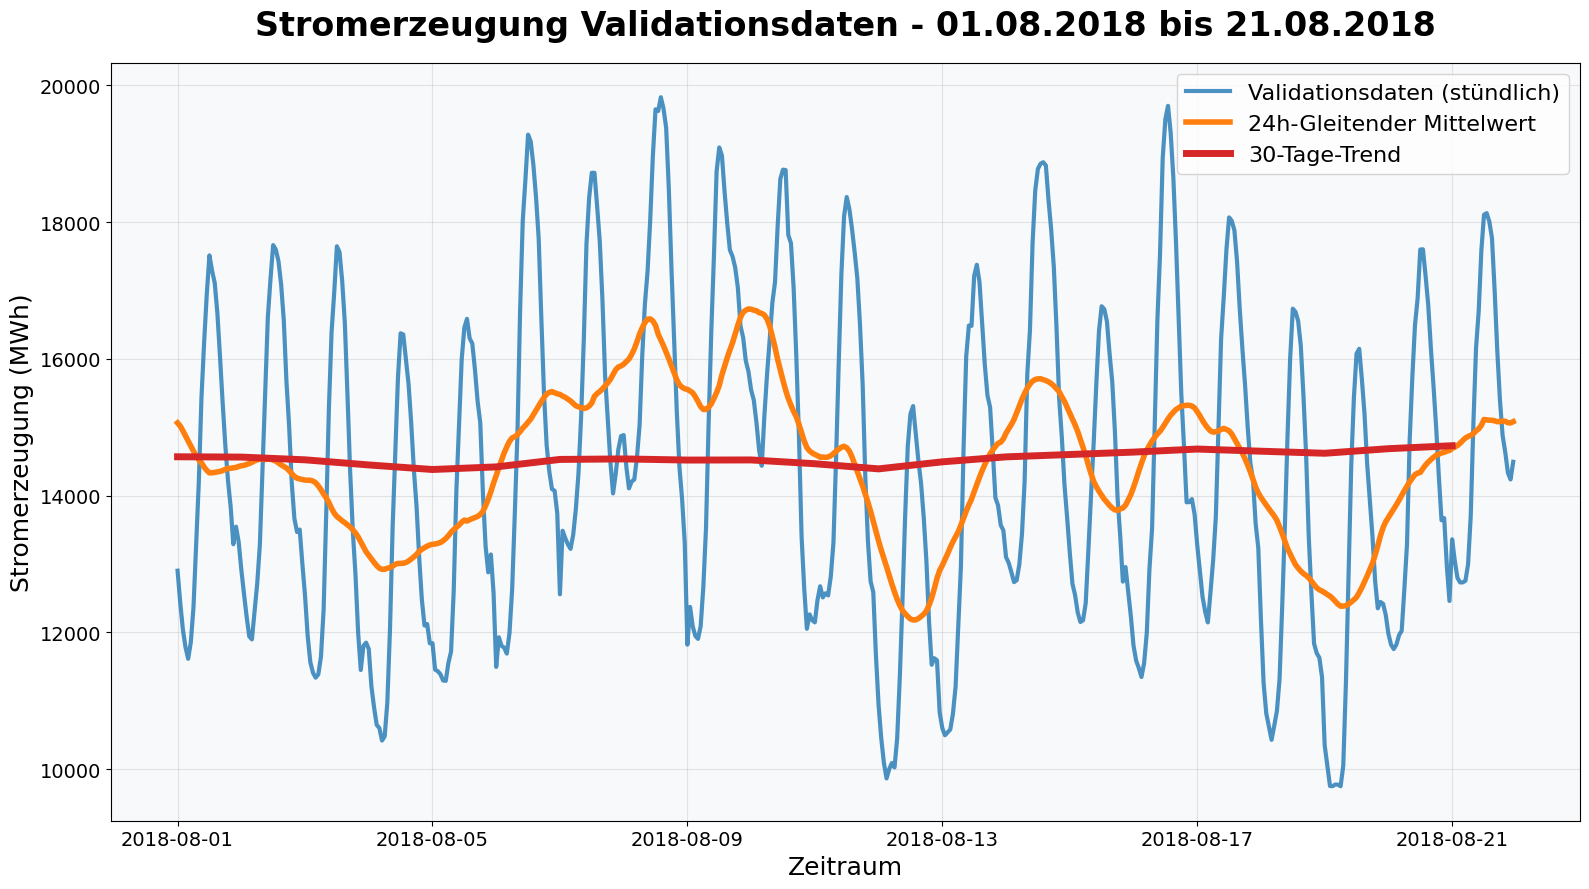

/kaggle/working/stromerzeugung_praesentation.png

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import FileLink, display

# ===== ERWEITERTE CONFIG =====
config = {
    'start_date': '2018-08-01',        # Startdatum für Anzeigefenster
    'duration_days': 21,               # Dauer in Tagen für Anzeigefenster
    'show_24h_trend': True,            # Gleitender 24h-Mittelwert anzeigen
    'show_30d_trend': True,            # 30-Tage-Trend anzeigen
    'file_path': 'stromerzeugung_praesentation.png'
}

# FIXER VALIDATIONSDATENSATZ
zeitraum2_stunden = neu.loc['2018-07-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt']
zeitraum2_tag = neu.loc['2018-07-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()

# Trends für KOMPLETTEN Validationsdatensatz berechnen (nur wenn aktiviert)
if config['show_30d_trend']:
    trend_30_tage = zeitraum2_tag.rolling(window=30, center=True).mean()

if config['show_24h_trend']:
    trend_taeglich = zeitraum2_stunden.rolling(window=24, center=True).mean()

# Anzeigefenster berechnen
start_datetime = pd.to_datetime(config['start_date'])
end_datetime = start_datetime + pd.Timedelta(days=config['duration_days']-1, hours=23)

print(f"Validationsdatensatz: 2018-07-01 bis 2018-12-31 (komplett)")
print(f"Anzeigefenster: {start_datetime.strftime('%Y-%m-%d')} bis {end_datetime.strftime('%Y-%m-%d')} ({config['duration_days']} Tage)")
print(f"24h-Trend: {'✅ Aktiviert' if config['show_24h_trend'] else '❌ Deaktiviert'}")
print(f"30d-Trend: {'✅ Aktiviert' if config['show_30d_trend'] else '❌ Deaktiviert'}")

# Daten für Anzeigefenster filtern
display_stunden = zeitraum2_stunden.loc[start_datetime:end_datetime]

if config['show_30d_trend']:
    display_30_trend = trend_30_tage.loc[start_datetime:end_datetime]

if config['show_24h_trend']:
    display_taeglich_trend = trend_taeglich.loc[start_datetime:end_datetime]

# Plot im Präsentationsformat erstellen
fig, ax = plt.subplots(figsize=(16, 9))  # 16:9 Format für Präsentationen

# Stündliche Daten (Validationsdaten) - DICKER
ax.plot(display_stunden.index, display_stunden.values, 
        color='#1f77b4', alpha=0.8, linewidth=3, label='Validationsdaten (stündlich)')

# Gleitender täglicher Mittelwert (24h) - DICKER
if config['show_24h_trend']:
    ax.plot(display_taeglich_trend.index, display_taeglich_trend.values, 
            color='#ff7f0e', linewidth=4, label='24h-Gleitender Mittelwert')

# 30-Tage-Trend - DICKER
if config['show_30d_trend']:
    ax.plot(display_30_trend.index, display_30_trend.values, 
            color='#d62728', linewidth=5, label='30-Tage-Trend')

# Große, lesbare Schrift für Präsentation
ax.set_title(f'Stromerzeugung Validationsdaten - {start_datetime.strftime("%d.%m.%Y")} bis {end_datetime.strftime("%d.%m.%Y")}', 
             fontsize=24, fontweight='bold', pad=20)
ax.set_xlabel('Zeitraum', fontsize=18)
ax.set_ylabel('Stromerzeugung (MWh)', fontsize=18)
ax.legend(fontsize=16, loc='upper right')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=14)

# Hintergrundfarbe für bessere Sichtbarkeit
ax.set_facecolor('#f8f9fa')
plt.tight_layout()
plt.savefig(config['file_path'], dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

display(FileLink(config['file_path']))


In [33]:
# Statistische Beschreibung für alle 6 Datensätze
datasets = [
    ("Strom_train", Strom_train),
    ("Strom_valid", Strom_valid),
    ("Strom_test", Strom_test),
    ("Strom_train_norm", Strom_train_norm),
    ("Strom_valid_norm", Strom_valid_norm),
    ("Strom_test_norm", Strom_test_norm)
]

print(f"{'Dataset':<20} {'Count':<8} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
print("-" * 80)

# Erste 3 Reihen ohne Nachkommastellen
for i in range(3):
    name, data = datasets[i]
    desc = data.describe()
    print(f"{name:<20} {desc['count']:<8.0f} {desc['mean']:<12.0f} {desc['std']:<12.0f} {desc['min']:<12.0f} {desc['max']:<12.0f}")

# Leere Zeile
print()

# Letzte 3 Reihen mit Nachkommastellen
for i in range(3, 6):
    name, data = datasets[i]
    desc = data.describe()
    print(f"{name:<20} {desc['count']:<8.0f} {desc['mean']:<12.2f} {desc['std']:<12.2f} {desc['min']:<12.2f} {desc['max']:<12.2f}")


Dataset              Count    Mean         Std          Min          Max         
--------------------------------------------------------------------------------
Strom_train          30647    15181        2454         7750         24124       
Strom_valid          4417     15472        2358         9593         20716       
Strom_test           3647     15734        2714         8132         21317       

Strom_train_norm     30647    0.00         1.00         -3.03        3.64        
Strom_valid_norm     4417     0.12         0.96         -2.28        2.26        
Strom_test_norm      3647     0.23         1.11         -2.87        2.50        


# 24h 1 Layer

In [45]:
#definitionen
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import tensorflow as tf

def load_best_model(model_name, model_dir):
    """Lädt das beste Modell basierend auf VAL_MAE"""
    history_path = f"{model_dir}{model_name}_history.pkl"
    
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    
    best_epoch = np.argmin(history['val_mae']) + 1
    model_path = f"{model_dir}{model_name}-epoch-{best_epoch:02d}.keras"
    model = tf.keras.models.load_model(model_path)
    
    print(f"{model_name}: Beste Epoche {best_epoch}")
    return model, best_epoch

def generate_predictions(model, base_offset, num_plots, num_predictions):
    """Generiert Vorhersagen für alle Plots"""
    all_data = []
    prediction_info = []
    
    for plot_idx in range(num_plots):
        plot_offset = base_offset + (plot_idx * 672)  # GEÄNDERT: 672 = 28 Tage * 24 Stunden
        predictions, targets, time_indices, info = [], [], [], []
        
        for i in range(num_predictions):
            input_start = plot_offset + (i * 24)
            input_end = input_start + 336
            pred_start, pred_end = input_end, input_end + 24
            
            # Vorhersage
            input_seq = Strom_valid_norm.iloc[input_start:input_end].to_numpy().reshape(1, 336, 1)
            target_seq = Strom_valid.iloc[pred_start:pred_end].to_numpy()
            prediction_norm = model.predict(input_seq, verbose=0)
            prediction = (prediction_norm[0] * std) + mean
            
            # Sammeln
            predictions.extend(prediction)
            targets.extend(target_seq)
            time_indices.extend(Strom_valid.iloc[pred_start:pred_end].index)
            info.append(f"{i+1}/{num_predictions}|{input_start}-{input_end-1}|{pred_start}-{pred_end-1}")
        
        all_data.append({
            'predictions': predictions, 'targets': targets, 
            'time_indices': time_indices, 'offset_days': plot_idx * 28  # GEÄNDERT: 28 statt 30
        })
        prediction_info.append(info)
    
    return all_data, prediction_info

def print_comparison_table(info_dict, num_plots, num_predictions):
    """Druckt Vergleichstabelle für beide Modelle - FLEXIBEL für alle Modellnamen"""
    model_names = list(info_dict.keys())
    model1, model2 = model_names[0], model_names[1]
    
    print(f"\n=== VORHERSAGE-ÜBERSICHT: {model1} vs {model2} ===")
    
    for plot_idx in range(num_plots):
        print(f"\nPlot {plot_idx + 1}/{num_plots} (Offset: +{plot_idx * 28} Tage)")  # GEÄNDERT: 28 statt 30
        print("=" * 100)
        print(f"{model1:<48} {model2:<48}")
        print(f"{'Vorhersage':<12} {'Input Range':<18} {'Pred Range':<18} {'Vorhersage':<12} {'Input Range':<18} {'Pred Range':<18}")
        print("-" * 100)
        
        model1_info = info_dict[model1][plot_idx]
        model2_info = info_dict[model2][plot_idx]
        
        for i in range(num_predictions):
            model1_parts = model1_info[i].split('|')
            model2_parts = model2_info[i].split('|')
            print(f"{model1_parts[0]:<12} {model1_parts[1]:<18} {model1_parts[2]:<18} "
                  f"{model2_parts[0]:<12} {model2_parts[1]:<18} {model2_parts[2]:<18}")

print("Funktionen geladen!")


Funktionen geladen!


Offset: 30 Tage | Vorhersagen: 7 × 24h | Plots: 3
model_GRU64_gradclip_RedPl: Beste Epoche 100
model_LSTM64_gradclip_RedPl: Beste Epoche 54

=== VORHERSAGE-ÜBERSICHT: GRU64 vs LSTM64 ===

Plot 1/3 (Offset: +0 Tage)
GRU64                                            LSTM64                                          
Vorhersage   Input Range        Pred Range         Vorhersage   Input Range        Pred Range        
----------------------------------------------------------------------------------------------------
1/7          720-1055           1056-1079          1/7          720-1055           1056-1079         
2/7          744-1079           1080-1103          2/7          744-1079           1080-1103         
3/7          768-1103           1104-1127          3/7          768-1103           1104-1127         
4/7          792-1127           1128-1151          4/7          792-1127           1128-1151         
5/7          816-1151           1152-1175          5/7          816-1151    

/kaggle/working/LSTM64_vs_GRU64_comparison_plot.png

📊 Dateigröße: 2.46 MB


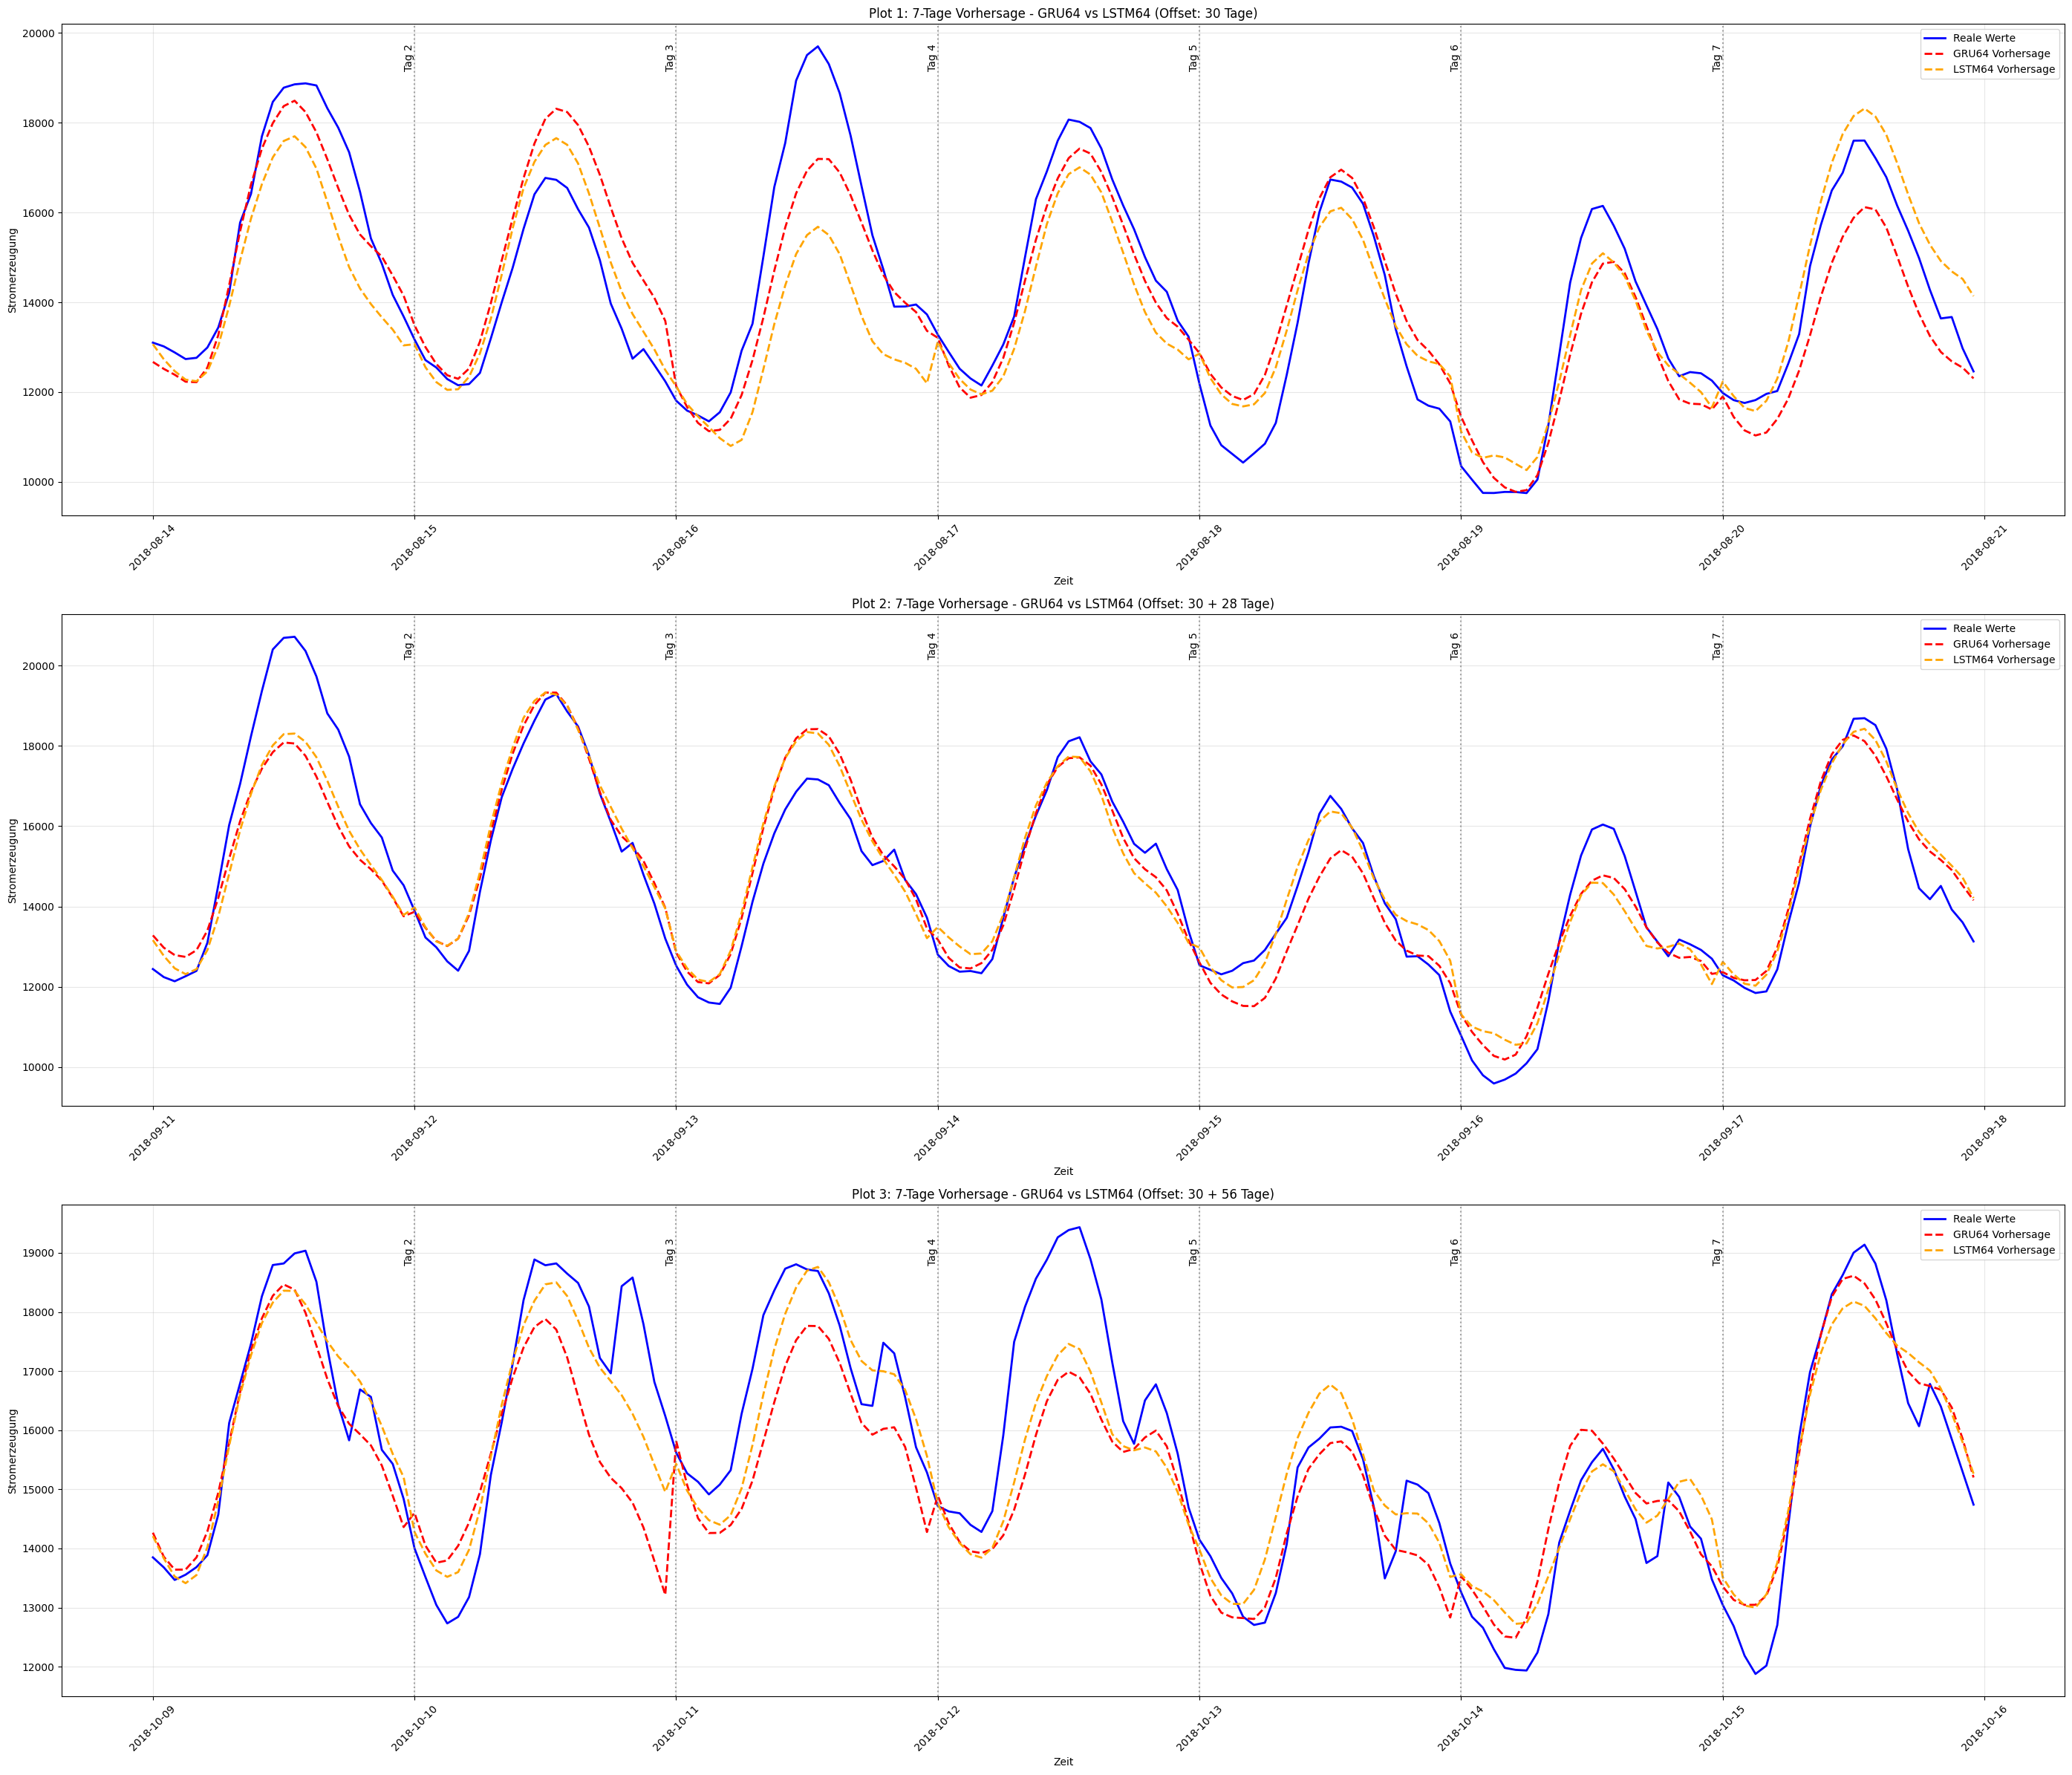

In [59]:
import os
from IPython.display import FileLink

# ===== CONFIG =====
config = {
    'Offset_Tage': 30,
    'num_predictions': 7,
    'num_plots': 3,
    'colors': {
        'real_values': 'blue',      # Farbe für reale Werte
        'GRU64': 'red',            # Farbe für GRU64 Vorhersagen
        'LSTM64': 'orange'         # Farbe für LSTM64 Vorhersagen
    },
    'save_plot': True,              # Plot speichern aktivieren
    'plot_filename': 'LSTM64_vs_GRU64_comparison_plot.png'  # Dateiname für gespeicherten Plot
}

# Modell-Konfiguration
models = {
    'GRU64': "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/",
    'LSTM64': "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/"
}

# ===== HAUPTPROGRAMM =====
input_start_base = config['Offset_Tage'] * 24
total_needed = input_start_base + ((config['num_plots'] - 1) * 672) + 336 + (config['num_predictions'] * 24)

print(f"Offset: {config['Offset_Tage']} Tage | Vorhersagen: {config['num_predictions']} × 24h | Plots: {config['num_plots']}")

if total_needed > len(Strom_valid_norm):
    print(f"FEHLER: Nicht genug Daten! Benötigt: {total_needed}, Verfügbar: {len(Strom_valid_norm)}")
else:
    # Modelle laden
    loaded_models = {}
    for name, path in models.items():
        model_name = f"model_{name}_gradclip_RedPl"
        loaded_models[name], _ = load_best_model(model_name, path)
    
    # Vorhersagen generieren
    all_plot_data = {}
    prediction_info = {}
    
    for name, model in loaded_models.items():
        all_plot_data[name], prediction_info[name] = generate_predictions(
            model, input_start_base, config['num_plots'], config['num_predictions']
        )
    
    # Tabelle ausgeben
    print_comparison_table(prediction_info, config['num_plots'], config['num_predictions'])
    
    # Plots erstellen
    fig, axes = plt.subplots(config['num_plots'], 1, 
                            figsize=(max(15, config['num_predictions'] * 4), config['num_plots'] * 8))
    if config['num_plots'] == 1:
        axes = [axes]
    
    for plot_idx, ax in enumerate(axes):
        # Daten plotten
        for i, (name, data_list) in enumerate(all_plot_data.items()):
            data = data_list[plot_idx]
            
            if i == 0:  # Reale Werte nur einmal
                ax.plot(data['time_indices'], data['targets'], 
                       config['colors']['real_values'], linewidth=2, label='Reale Werte')
            
            ax.plot(data['time_indices'], data['predictions'], 
                   config['colors'][name], linewidth=2, linestyle='--', 
                   label=f'{name} Vorhersage')
        
        # Tages-Trennung
        for i in range(1, config['num_predictions']):
            boundary = data['time_indices'][i * 24]
            ax.axvline(boundary, color='gray', linestyle=':', alpha=0.7)
            ax.text(boundary, ax.get_ylim()[1] * 0.95, f'Tag {i+1}', rotation=90, ha='right')
        
        # Formatierung
        offset_info = f"Offset: {config['Offset_Tage']} + {data['offset_days']} Tage" if data['offset_days'] > 0 else f"Offset: {config['Offset_Tage']} Tage"
        ax.set_title(f'Plot {plot_idx + 1}: {config["num_predictions"]}-Tage Vorhersage - GRU64 vs LSTM64 ({offset_info})')
        ax.set_xlabel('Zeit')
        ax.set_ylabel('Stromerzeugung')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # Plot speichern (falls aktiviert)
    if config['save_plot']:
        # Speicherpfad im Kaggle Working Directory
        save_path = f"/kaggle/working/{config['plot_filename']}"
        
        # Plot als PNG speichern
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        
        print(f"\n📁 Plot gespeichert unter: {save_path}")
        
        # Download-Link anzeigen
        print("📥 Download-Link:")
        display(FileLink(save_path))
        
        # Zusätzliche Informationen
        file_size = os.path.getsize(save_path) / (1024 * 1024)  # MB
        print(f"📊 Dateigröße: {file_size:.2f} MB")
    
    # Plot anzeigen
    plt.show()


# 2Layer 24h

In [34]:
#defintionen
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import tensorflow as tf

def load_best_model(model_name, model_dir):
    """Lädt das beste Modell basierend auf VAL_MAE"""
    history_path = f"{model_dir}{model_name}_history.pkl"
    
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    
    best_epoch = np.argmin(history['val_mae']) + 1
    model_path = f"{model_dir}{model_name}-epoch-{best_epoch:02d}.keras"
    model = tf.keras.models.load_model(model_path)
    
    print(f"{model_name}: Beste Epoche {best_epoch}")
    return model, best_epoch

def generate_predictions(model, base_offset, num_plots, num_predictions):
    """Generiert Vorhersagen für alle Plots"""
    all_data = []
    prediction_info = []
    
    for plot_idx in range(num_plots):
        plot_offset = base_offset + (plot_idx * 672)  # GEÄNDERT: 672 = 28 Tage * 24 Stunden
        predictions, targets, time_indices, info = [], [], [], []
        
        for i in range(num_predictions):
            input_start = plot_offset + (i * 24)
            input_end = input_start + 336
            pred_start, pred_end = input_end, input_end + 24
            
            # Vorhersage
            input_seq = Strom_valid_norm.iloc[input_start:input_end].to_numpy().reshape(1, 336, 1)
            target_seq = Strom_valid.iloc[pred_start:pred_end].to_numpy()
            prediction_norm = model.predict(input_seq, verbose=0)
            prediction = (prediction_norm[0] * std) + mean
            
            # Sammeln
            predictions.extend(prediction)
            targets.extend(target_seq)
            time_indices.extend(Strom_valid.iloc[pred_start:pred_end].index)
            info.append(f"{i+1}/{num_predictions}|{input_start}-{input_end-1}|{pred_start}-{pred_end-1}")
        
        all_data.append({
            'predictions': predictions, 'targets': targets, 
            'time_indices': time_indices, 'offset_days': plot_idx * 28  # GEÄNDERT: 28 statt 30
        })
        prediction_info.append(info)
    
    return all_data, prediction_info

def print_comparison_table(info_dict, num_plots, num_predictions):
    """Druckt Vergleichstabelle für beide Modelle - FLEXIBEL für alle Modellnamen"""
    model_names = list(info_dict.keys())
    model1, model2 = model_names[0], model_names[1]
    
    print(f"\n=== VORHERSAGE-ÜBERSICHT: {model1} vs {model2} ===")
    
    for plot_idx in range(num_plots):
        print(f"\nPlot {plot_idx + 1}/{num_plots} (Offset: +{plot_idx * 28} Tage)")  # GEÄNDERT: 28 statt 30
        print("=" * 100)
        print(f"{model1:<48} {model2:<48}")
        print(f"{'Vorhersage':<12} {'Input Range':<18} {'Pred Range':<18} {'Vorhersage':<12} {'Input Range':<18} {'Pred Range':<18}")
        print("-" * 100)
        
        model1_info = info_dict[model1][plot_idx]
        model2_info = info_dict[model2][plot_idx]
        
        for i in range(num_predictions):
            model1_parts = model1_info[i].split('|')
            model2_parts = model2_info[i].split('|')
            print(f"{model1_parts[0]:<12} {model1_parts[1]:<18} {model1_parts[2]:<18} "
                  f"{model2_parts[0]:<12} {model2_parts[1]:<18} {model2_parts[2]:<18}")

print("Funktionen geladen!")


Funktionen geladen!


Offset: 30 Tage | Vorhersagen: 7 × 24h | Plots: 3
model_LSTM64x2_gradclip_RedPl_seq672_B128: Beste Epoche 100
model_GRU32x2_gradclip_RedPl_seq336_B128: Beste Epoche 100

=== VORHERSAGE-ÜBERSICHT: LSTM32x2 vs GRU32x2 ===

Plot 1/3 (Offset: +0 Tage)
LSTM32x2                                         GRU32x2                                         
Vorhersage   Input Range        Pred Range         Vorhersage   Input Range        Pred Range        
----------------------------------------------------------------------------------------------------
1/7          720-1055           1056-1079          1/7          720-1055           1056-1079         
2/7          744-1079           1080-1103          2/7          744-1079           1080-1103         
3/7          768-1103           1104-1127          3/7          768-1103           1104-1127         
4/7          792-1127           1128-1151          4/7          792-1127           1128-1151         
5/7          816-1151           1152-1175  

/kaggle/working/LSTM32x2_vs_GRU32x2_comparison.png

📊 Dateigröße: 2.50 MB


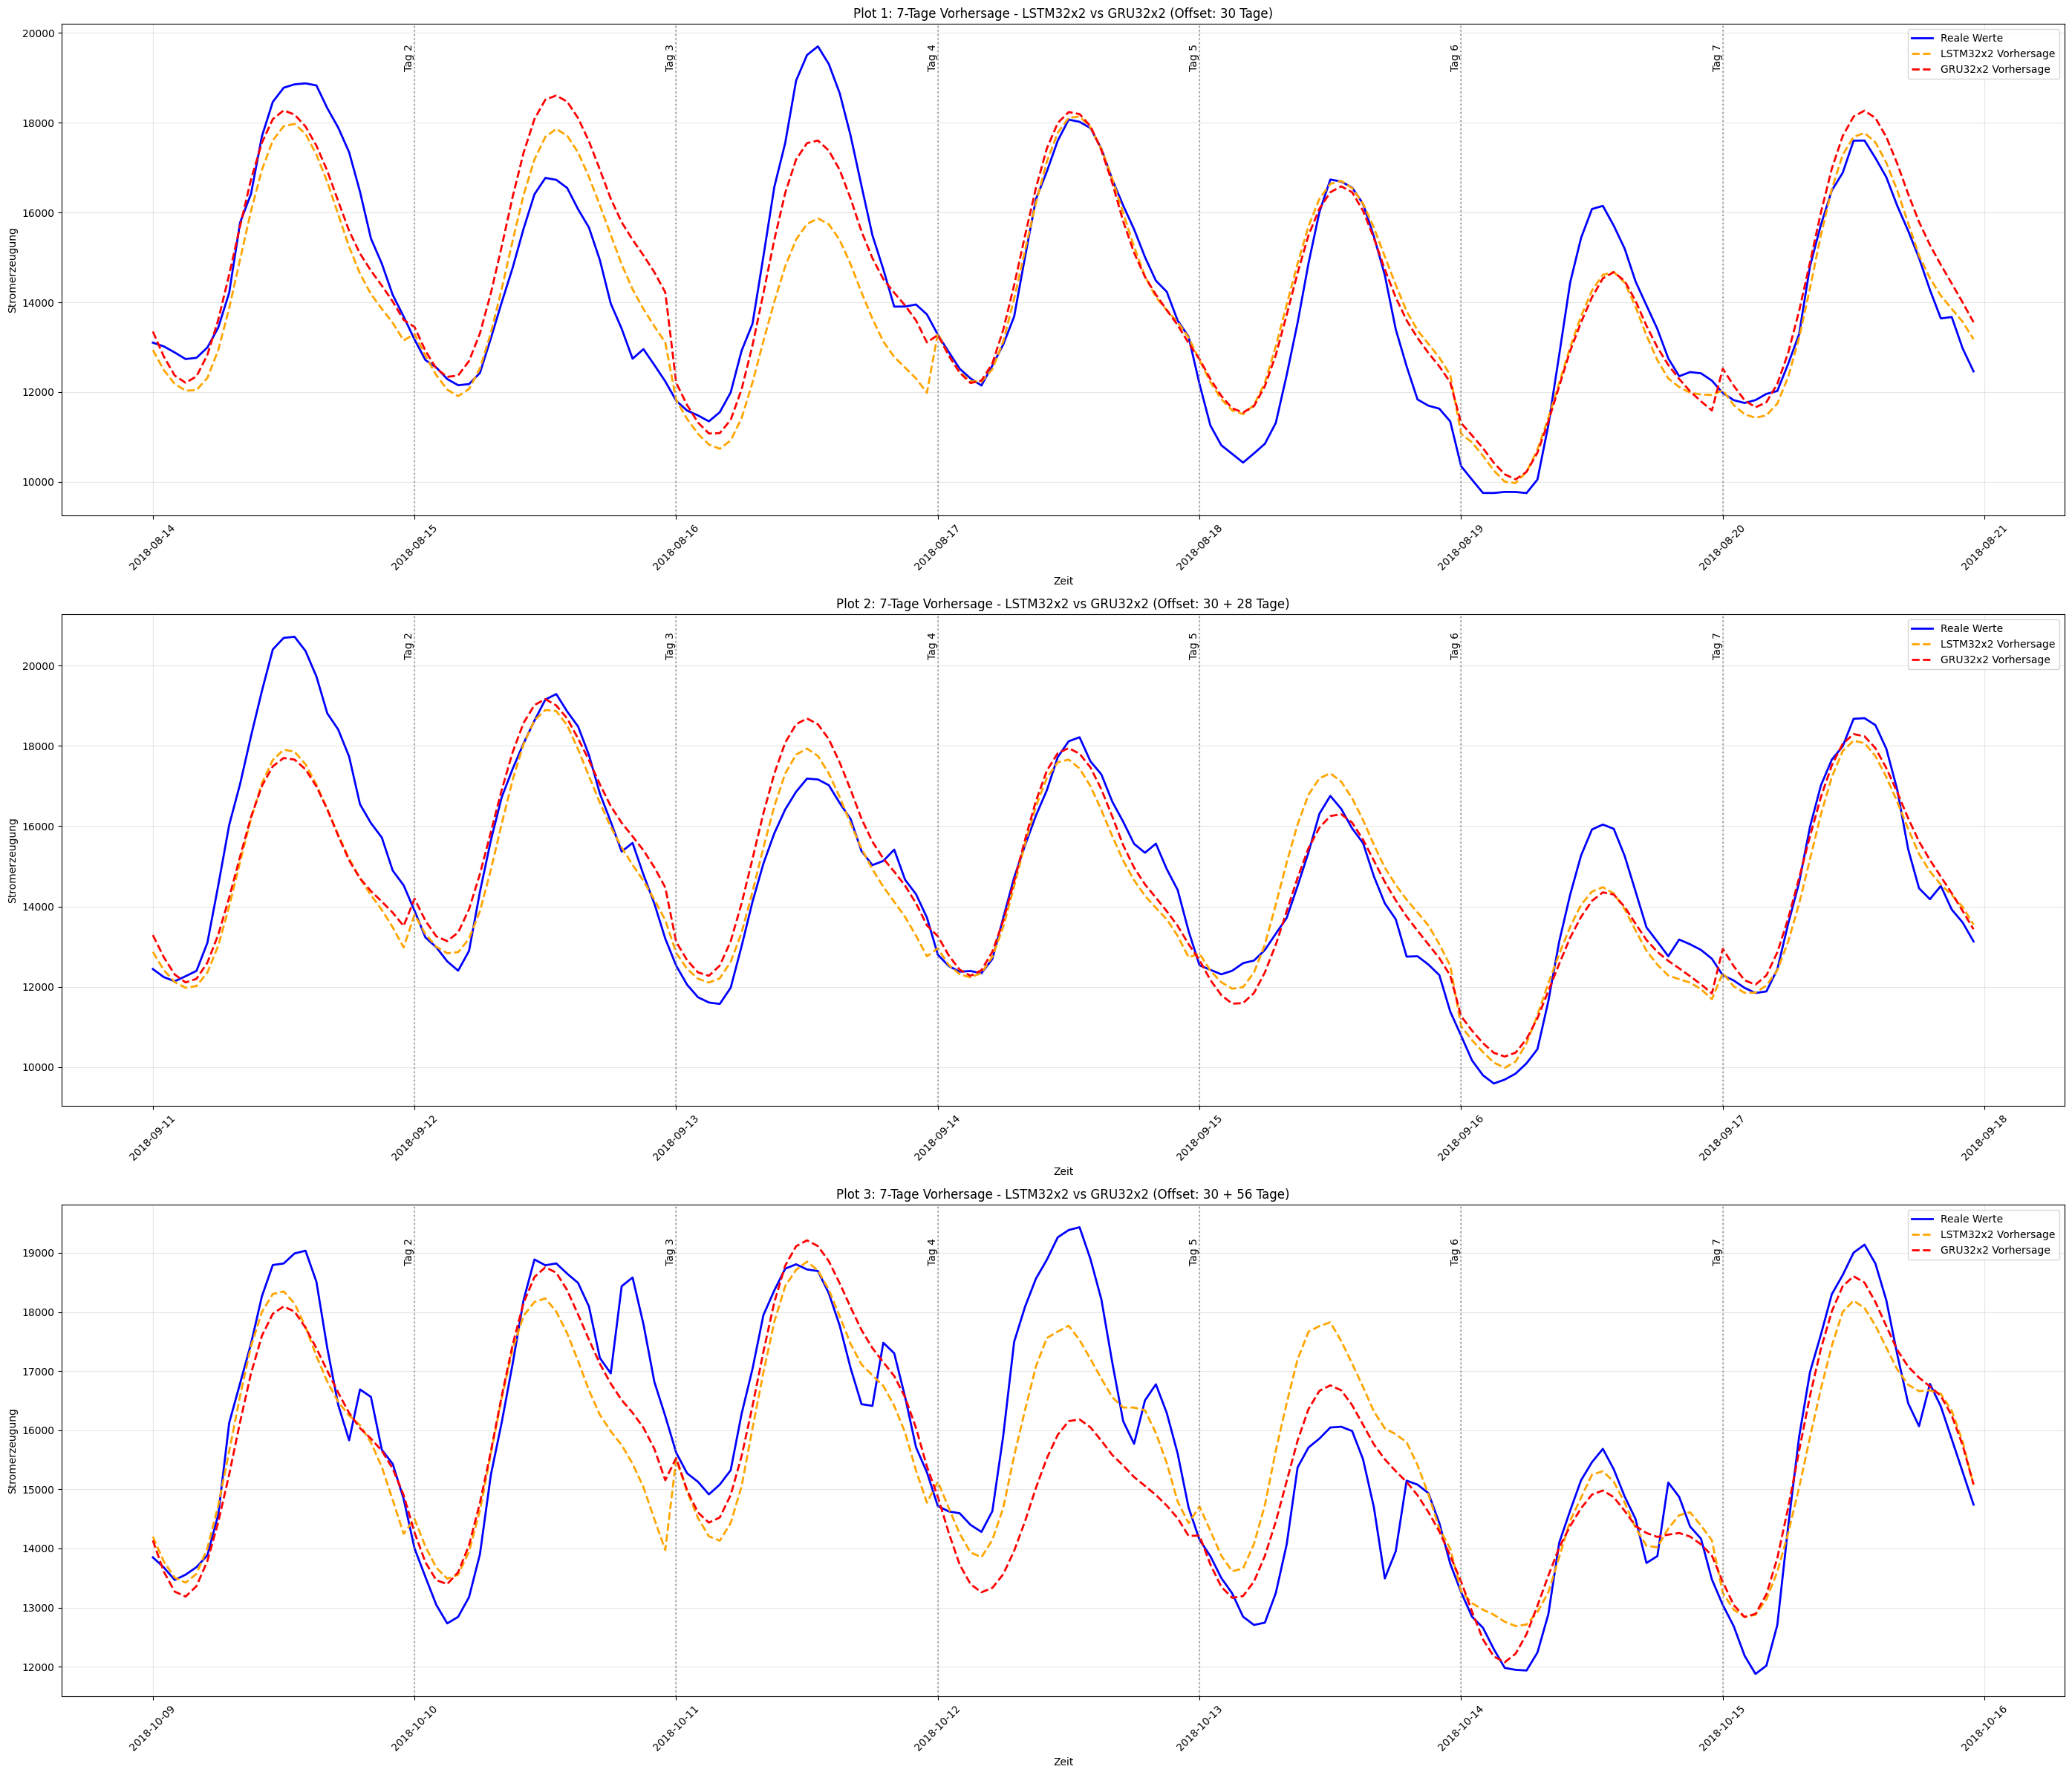

In [60]:
import os
from IPython.display import FileLink

# ===== CONFIG =====
config = {
    'Offset_Tage': 30,
    'num_predictions': 7,
    'num_plots': 3,
    'colors': {
        'real_values': 'blue',      # Farbe für reale Werte
        'LSTM32x2': 'orange',       # Farbe für LSTM32x2 Vorhersagen
        'GRU32x2': 'red'           # Farbe für GRU32x2 Vorhersagen
    },
    'save_plot': True,              # Plot speichern aktivieren
    'plot_filename': 'LSTM32x2_vs_GRU32x2_comparison.png'  # Dateiname für gespeicherten Plot
}

# Modell-Konfiguration mit neuen Modellen
models = {
    'LSTM32x2': "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/",
    'GRU32x2': "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/"
}

# ===== HAUPTPROGRAMM =====
input_start_base = config['Offset_Tage'] * 24
total_needed = input_start_base + ((config['num_plots'] - 1) * 672) + 336 + (config['num_predictions'] * 24)

print(f"Offset: {config['Offset_Tage']} Tage | Vorhersagen: {config['num_predictions']} × 24h | Plots: {config['num_plots']}")

if total_needed > len(Strom_valid_norm):
    print(f"FEHLER: Nicht genug Daten! Benötigt: {total_needed}, Verfügbar: {len(Strom_valid_norm)}")
else:
    # Modelle laden
    loaded_models = {}
    for name, path in models.items():
        # Anpassung der Modellnamen entsprechend der Verzeichnisstruktur
        if name == 'LSTM32x2':
            model_name = "model_LSTM64x2_gradclip_RedPl_seq672_B128"
        else:  # GRU32x2
            model_name = "model_GRU32x2_gradclip_RedPl_seq336_B128"
        
        loaded_models[name], _ = load_best_model(model_name, path)
    
    # Vorhersagen generieren
    all_plot_data = {}
    prediction_info = {}
    
    for name, model in loaded_models.items():
        all_plot_data[name], prediction_info[name] = generate_predictions(
            model, input_start_base, config['num_plots'], config['num_predictions']
        )
    
    # Tabelle ausgeben
    print_comparison_table(prediction_info, config['num_plots'], config['num_predictions'])
    
    # Plots erstellen
    fig, axes = plt.subplots(config['num_plots'], 1, 
                            figsize=(max(15, config['num_predictions'] * 4), config['num_plots'] * 8))
    if config['num_plots'] == 1:
        axes = [axes]
    
    for plot_idx, ax in enumerate(axes):
        # Daten plotten
        for i, (name, data_list) in enumerate(all_plot_data.items()):
            data = data_list[plot_idx]
            
            if i == 0:  # Reale Werte nur einmal
                ax.plot(data['time_indices'], data['targets'], 
                       config['colors']['real_values'], linewidth=2, label='Reale Werte')
            
            ax.plot(data['time_indices'], data['predictions'], 
                   config['colors'][name], linewidth=2, linestyle='--', 
                   label=f'{name} Vorhersage')
        
        # Tages-Trennung
        for i in range(1, config['num_predictions']):
            boundary = data['time_indices'][i * 24]
            ax.axvline(boundary, color='gray', linestyle=':', alpha=0.7)
            ax.text(boundary, ax.get_ylim()[1] * 0.95, f'Tag {i+1}', rotation=90, ha='right')
        
        # Formatierung
        offset_info = f"Offset: {config['Offset_Tage']} + {data['offset_days']} Tage" if data['offset_days'] > 0 else f"Offset: {config['Offset_Tage']} Tage"
        ax.set_title(f'Plot {plot_idx + 1}: {config["num_predictions"]}-Tage Vorhersage - LSTM32x2 vs GRU32x2 ({offset_info})')
        ax.set_xlabel('Zeit')
        ax.set_ylabel('Stromerzeugung')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # Plot speichern (falls aktiviert)
    if config['save_plot']:
        # Speicherpfad im Kaggle Working Directory
        save_path = f"/kaggle/working/{config['plot_filename']}"
        
        # Plot als PNG speichern
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        
        print(f"\n📁 Plot gespeichert unter: {save_path}")
        
        # Download-Link anzeigen
        print("📥 Download-Link:")
        display(FileLink(save_path))
        
        # Zusätzliche Informationen
        file_size = os.path.getsize(save_path) / (1024 * 1024)  # MB
        print(f"📊 Dateigröße: {file_size:.2f} MB")
    
    # Plot anzeigen
    plt.show()


# 1h 1 layer

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import tensorflow as tf

def load_best_model(model_name, model_dir):
    """Lädt das beste Modell basierend auf VAL_MAE"""
    history_path = f"{model_dir}{model_name}_history.pkl"
    
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    
    best_epoch = np.argmin(history['val_mae']) + 1
    model_path = f"{model_dir}{model_name}-epoch-{best_epoch:02d}.keras"
    model = tf.keras.models.load_model(model_path)
    
    print(f"{model_name}: Beste Epoche {best_epoch}")
    return model, best_epoch

def generate_predictions_iterative(model, base_offset, num_plots, num_predictions):
    """Generiert iterative 24h-Vorhersagen für 1h-Modelle"""
    all_data = []
    prediction_info = []
    
    for plot_idx in range(num_plots):
        plot_offset = base_offset + (plot_idx * 672)
        predictions, targets, time_indices, info = [], [], [], []
        
        for i in range(num_predictions):
            input_start = plot_offset + (i * 24)
            input_end = input_start + 336
            pred_start, pred_end = input_end, input_end + 24
            
            # Initiale Eingabesequenz
            input_seq = Strom_valid_norm.iloc[input_start:input_end].to_numpy()
            target_seq = Strom_valid.iloc[pred_start:pred_end].to_numpy()
            
            # Iterative 24h-Vorhersage
            day_predictions = []
            current_input = input_seq.copy()
            
            for hour in range(24):
                model_input = current_input.reshape(1, 336, 1)
                next_hour_norm = model.predict(model_input, verbose=0)[0, 0]
                next_hour_real = (next_hour_norm * std) + mean
                
                day_predictions.append(next_hour_real)
                
                # Input-Fenster verschieben
                current_input = np.roll(current_input, -1)
                current_input[-1] = next_hour_norm
            
            predictions.extend(day_predictions)
            targets.extend(target_seq)
            time_indices.extend(Strom_valid.iloc[pred_start:pred_end].index)
            info.append(f"{i+1}/{num_predictions}|{input_start}-{input_end-1}|{pred_start}-{pred_end-1}")
        
        all_data.append({
            'predictions': predictions, 'targets': targets, 
            'time_indices': time_indices, 'offset_days': plot_idx * 28
        })
        prediction_info.append(info)
    
    return all_data, prediction_info

def print_comparison_table(info_dict, num_plots, num_predictions):
    """Druckt Vergleichstabelle für beide Modelle - FLEXIBEL für alle Modellnamen"""
    model_names = list(info_dict.keys())
    model1, model2 = model_names[0], model_names[1]
    
    print(f"\n=== VORHERSAGE-ÜBERSICHT: {model1} vs {model2} ===")
    
    for plot_idx in range(num_plots):
        print(f"\nPlot {plot_idx + 1}/{num_plots} (Offset: +{plot_idx * 28} Tage)")
        print("=" * 100)
        print(f"{model1:<48} {model2:<48}")
        print(f"{'Vorhersage':<12} {'Input Range':<18} {'Pred Range':<18} {'Vorhersage':<12} {'Input Range':<18} {'Pred Range':<18}")
        print("-" * 100)
        
        model1_info = info_dict[model1][plot_idx]
        model2_info = info_dict[model2][plot_idx]
        
        for i in range(num_predictions):
            model1_parts = model1_info[i].split('|')
            model2_parts = model2_info[i].split('|')
            print(f"{model1_parts[0]:<12} {model1_parts[1]:<18} {model1_parts[2]:<18} "
                  f"{model2_parts[0]:<12} {model2_parts[1]:<18} {model2_parts[2]:<18}")

print("Funktionen geladen!")


Funktionen geladen!


Offset: 30 Tage | Vorhersagen: 7 × 24h | Plots: 3
model_1Hour_LSTM64_gradclip_RedPl_seq336: Beste Epoche 98
model_1Hour_GRU64_gradclip_RedPl_seq336: Beste Epoche 67

=== VORHERSAGE-ÜBERSICHT: LSTM64 vs GRU64 ===

Plot 1/3 (Offset: +0 Tage)
LSTM64                                           GRU64                                           
Vorhersage   Input Range        Pred Range         Vorhersage   Input Range        Pred Range        
----------------------------------------------------------------------------------------------------
1/7          720-1055           1056-1079          1/7          720-1055           1056-1079         
2/7          744-1079           1080-1103          2/7          744-1079           1080-1103         
3/7          768-1103           1104-1127          3/7          768-1103           1104-1127         
4/7          792-1127           1128-1151          4/7          792-1127           1128-1151         
5/7          816-1151           1152-1175          

/kaggle/working/LSTM64_vs_GRU64_1hour_comparison.png

📊 Dateigröße: 2.46 MB


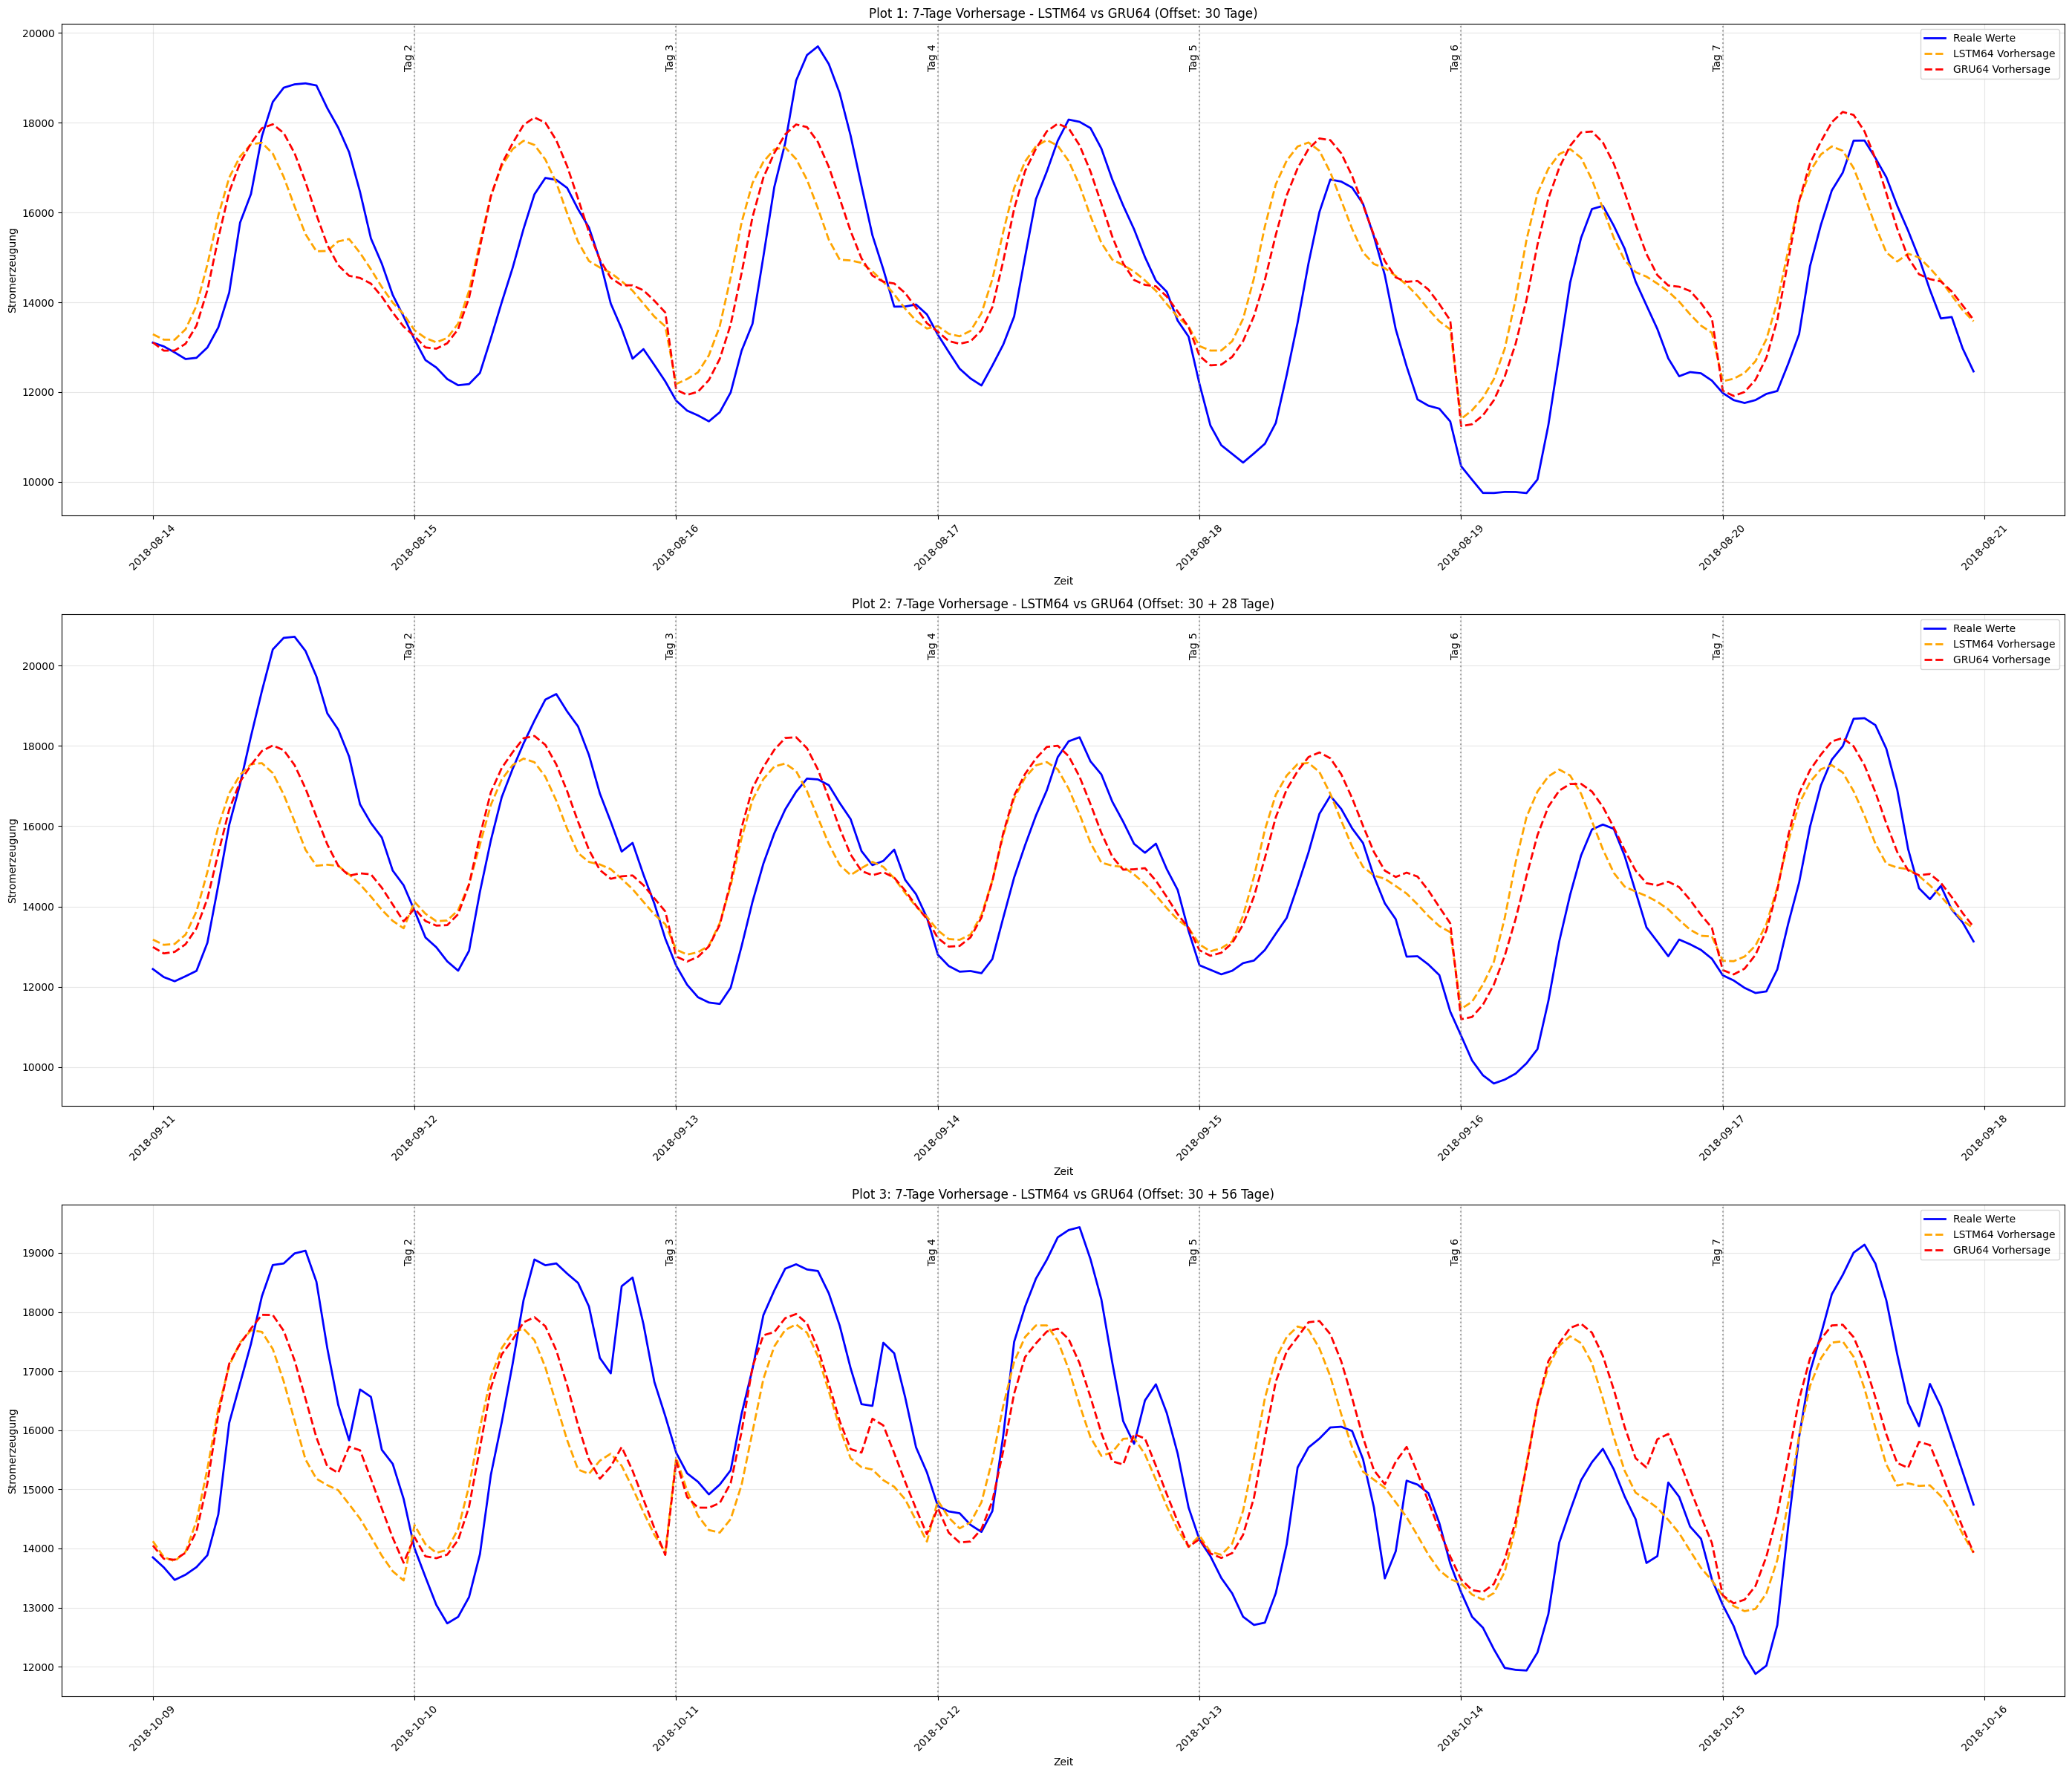

In [62]:
import os
from IPython.display import FileLink

# ===== CONFIG =====
config = {
    'Offset_Tage': 30,
    'num_predictions': 7,
    'num_plots': 3,
    'colors': {
        'real_values': 'blue',
        'LSTM64': 'orange',
        'GRU64': 'red'
    },
    'save_plot': True,
    'plot_filename': 'LSTM64_vs_GRU64_1hour_comparison.png'
}

# Modell-Konfiguration mit neuen LSTM64/GRU64 Modellen
models = {
    'LSTM64': "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/",
    'GRU64': "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/"
}

# ===== HAUPTPROGRAMM =====
input_start_base = config['Offset_Tage'] * 24
total_needed = input_start_base + ((config['num_plots'] - 1) * 672) + 336 + (config['num_predictions'] * 24)

print(f"Offset: {config['Offset_Tage']} Tage | Vorhersagen: {config['num_predictions']} × 24h | Plots: {config['num_plots']}")

if total_needed > len(Strom_valid_norm):
    print(f"FEHLER: Nicht genug Daten! Benötigt: {total_needed}, Verfügbar: {len(Strom_valid_norm)}")
else:
    # Modelle laden
    loaded_models = {}
    for name, path in models.items():
        if name == 'LSTM64':
            model_name = "model_1Hour_LSTM64_gradclip_RedPl_seq336"
        else:  # GRU64
            model_name = "model_1Hour_GRU64_gradclip_RedPl_seq336"
        
        loaded_models[name], _ = load_best_model(model_name, path)
    
    # Vorhersagen generieren
    all_plot_data = {}
    prediction_info = {}
    
    for name, model in loaded_models.items():
        all_plot_data[name], prediction_info[name] = generate_predictions_iterative(
            model, input_start_base, config['num_plots'], config['num_predictions']
        )
    
    # Tabelle ausgeben
    print_comparison_table(prediction_info, config['num_plots'], config['num_predictions'])
    
    # Plots erstellen
    fig, axes = plt.subplots(config['num_plots'], 1, 
                            figsize=(max(15, config['num_predictions'] * 4), config['num_plots'] * 8))
    if config['num_plots'] == 1:
        axes = [axes]
    
    for plot_idx, ax in enumerate(axes):
        # Daten plotten
        for i, (name, data_list) in enumerate(all_plot_data.items()):
            data = data_list[plot_idx]
            
            if i == 0:  # Reale Werte nur einmal
                ax.plot(data['time_indices'], data['targets'], 
                       config['colors']['real_values'], linewidth=2, label='Reale Werte')
            
            ax.plot(data['time_indices'], data['predictions'], 
                   config['colors'][name], linewidth=2, linestyle='--', 
                   label=f'{name} Vorhersage')
        
        # Tages-Trennung
        for i in range(1, config['num_predictions']):
            boundary = data['time_indices'][i * 24]
            ax.axvline(boundary, color='gray', linestyle=':', alpha=0.7)
            ax.text(boundary, ax.get_ylim()[1] * 0.95, f'Tag {i+1}', rotation=90, ha='right')
        
        # Formatierung
        offset_info = f"Offset: {config['Offset_Tage']} + {data['offset_days']} Tage" if data['offset_days'] > 0 else f"Offset: {config['Offset_Tage']} Tage"
        ax.set_title(f'Plot {plot_idx + 1}: {config["num_predictions"]}-Tage Vorhersage - LSTM64 vs GRU64 ({offset_info})')
        ax.set_xlabel('Zeit')
        ax.set_ylabel('Stromerzeugung')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # Plot speichern (falls aktiviert)
    if config['save_plot']:
        # Speicherpfad im Kaggle Working Directory
        save_path = f"/kaggle/working/{config['plot_filename']}"
        
        # Plot als PNG speichern
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        
        print(f"\n📁 Plot gespeichert unter: {save_path}")
        
        # Download-Link anzeigen
        print("📥 Download-Link:")
        display(FileLink(save_path))
        
        # Zusätzliche Informationen
        file_size = os.path.getsize(save_path) / (1024 * 1024)  # MB
        print(f"📊 Dateigröße: {file_size:.2f} MB")
    
    # Plot anzeigen
    plt.show()


# 1h 2Layer

Offset: 60 Tage | Vorhersagen: 7 × 24h | Plots: 3
model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128: Beste Epoche 42
model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128: Beste Epoche 54

=== VORHERSAGE-ÜBERSICHT: LSTM32x2 vs GRU32x2 ===

Plot 1/3 (Offset: +0 Tage)
LSTM32x2                                         GRU32x2                                         
Vorhersage   Input Range        Pred Range         Vorhersage   Input Range        Pred Range        
----------------------------------------------------------------------------------------------------
1/7          1440-1775          1776-1799          1/7          1440-1775          1776-1799         
2/7          1464-1799          1800-1823          2/7          1464-1799          1800-1823         
3/7          1488-1823          1824-1847          3/7          1488-1823          1824-1847         
4/7          1512-1847          1848-1871          4/7          1512-1847          1848-1871         
5/7          1536-1871          1

/kaggle/working/LSTM32x2_vs_GRU32x2_1hour_comparison.png

📊 Dateigröße: 2.56 MB


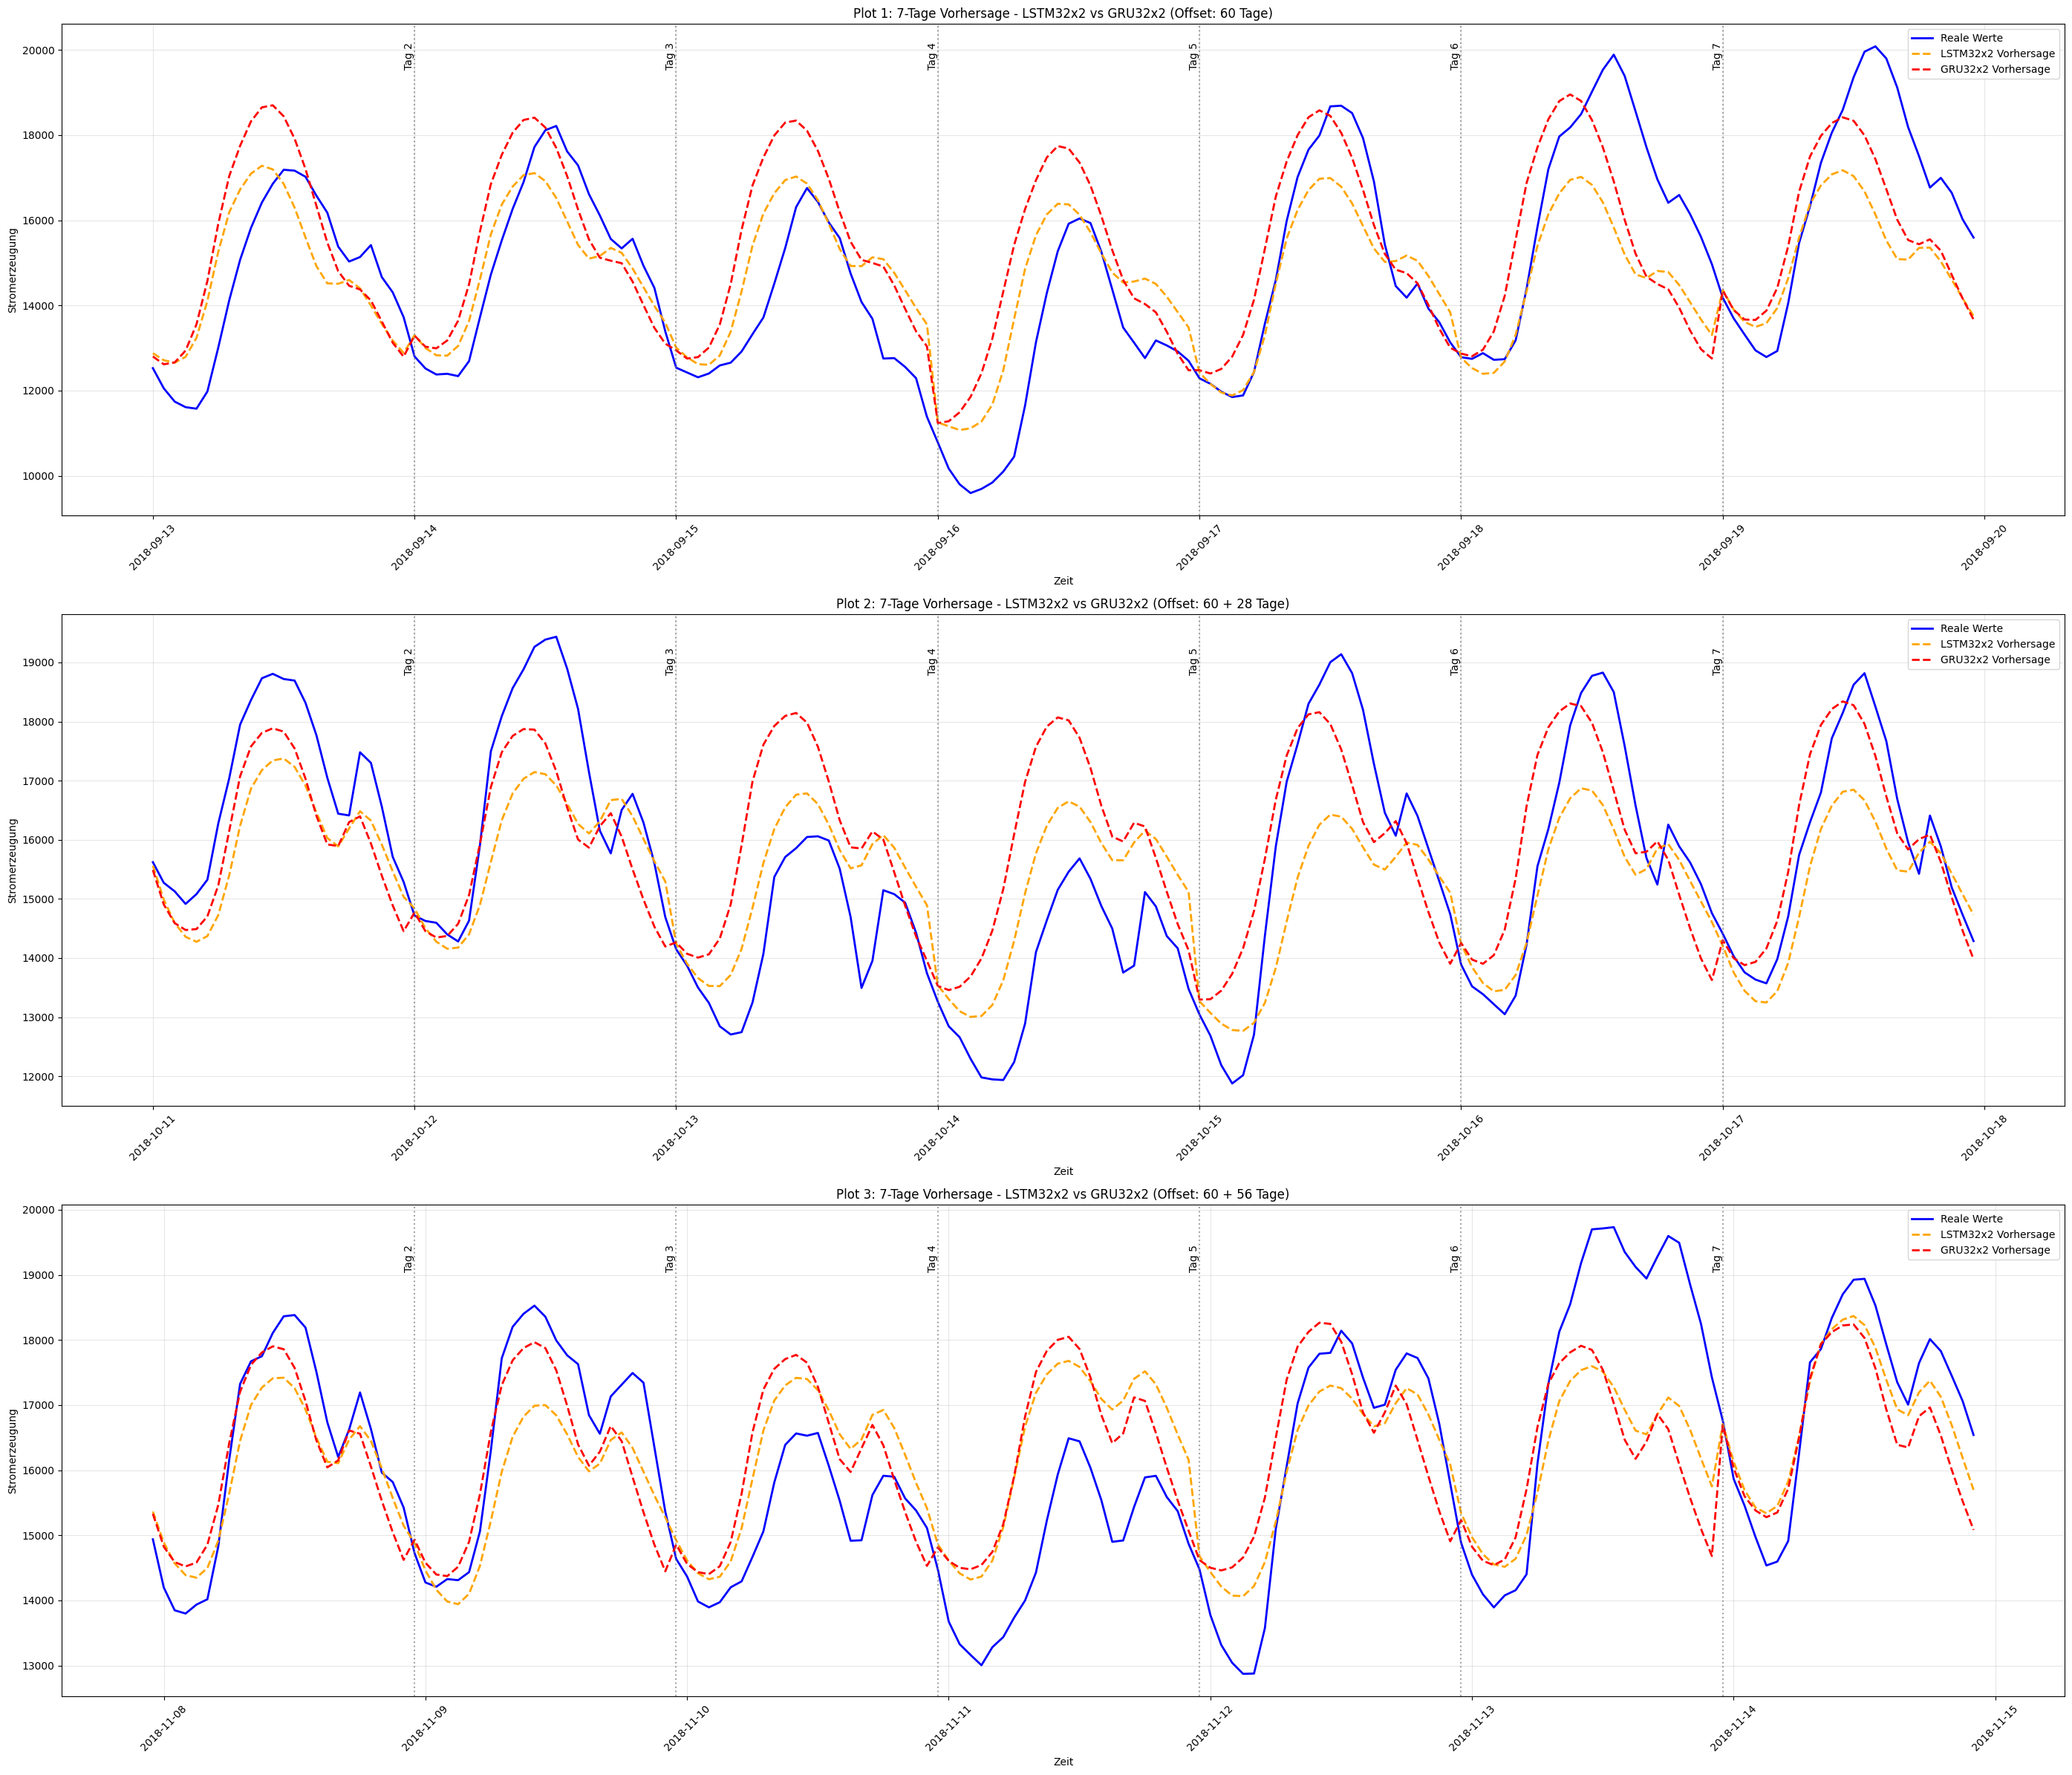

In [63]:
import os
from IPython.display import FileLink

# ===== CONFIG =====
config = {
    'Offset_Tage': 60,
    'num_predictions': 7,
    'num_plots': 3,
    'colors': {
        'real_values': 'blue',
        'LSTM32x2': 'orange',
        'GRU32x2': 'red'
    },
    'save_plot': True,
    'plot_filename': 'LSTM32x2_vs_GRU32x2_1hour_comparison.png'
}

# Modell-Konfiguration mit neuen 1h-Modellen
models = {
    'LSTM32x2': "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/",
    'GRU32x2': "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/"
}

# ===== HAUPTPROGRAMM =====
input_start_base = config['Offset_Tage'] * 24
total_needed = input_start_base + ((config['num_plots'] - 1) * 672) + 336 + (config['num_predictions'] * 24)

print(f"Offset: {config['Offset_Tage']} Tage | Vorhersagen: {config['num_predictions']} × 24h | Plots: {config['num_plots']}")

if total_needed > len(Strom_valid_norm):
    print(f"FEHLER: Nicht genug Daten! Benötigt: {total_needed}, Verfügbar: {len(Strom_valid_norm)}")
else:
    # Modelle laden
    loaded_models = {}
    for name, path in models.items():
        if name == 'LSTM32x2':
            model_name = "model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128"
        else:  # GRU32x2
            model_name = "model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128"
        
        loaded_models[name], _ = load_best_model(model_name, path)
    
    # Vorhersagen generieren
    all_plot_data = {}
    prediction_info = {}
    
    for name, model in loaded_models.items():
        all_plot_data[name], prediction_info[name] = generate_predictions_iterative(
            model, input_start_base, config['num_plots'], config['num_predictions']
        )
    
    # Tabelle ausgeben
    print_comparison_table(prediction_info, config['num_plots'], config['num_predictions'])
    
    # Plots erstellen
    fig, axes = plt.subplots(config['num_plots'], 1, 
                            figsize=(max(15, config['num_predictions'] * 4), config['num_plots'] * 8))
    if config['num_plots'] == 1:
        axes = [axes]
    
    for plot_idx, ax in enumerate(axes):
        # Daten plotten
        for i, (name, data_list) in enumerate(all_plot_data.items()):
            data = data_list[plot_idx]
            
            if i == 0:  # Reale Werte nur einmal
                ax.plot(data['time_indices'], data['targets'], 
                       config['colors']['real_values'], linewidth=2, label='Reale Werte')
            
            ax.plot(data['time_indices'], data['predictions'], 
                   config['colors'][name], linewidth=2, linestyle='--', 
                   label=f'{name} Vorhersage')
        
        # Tages-Trennung
        for i in range(1, config['num_predictions']):
            boundary = data['time_indices'][i * 24]
            ax.axvline(boundary, color='gray', linestyle=':', alpha=0.7)
            ax.text(boundary, ax.get_ylim()[1] * 0.95, f'Tag {i+1}', rotation=90, ha='right')
        
        # Formatierung
        offset_info = f"Offset: {config['Offset_Tage']} + {data['offset_days']} Tage" if data['offset_days'] > 0 else f"Offset: {config['Offset_Tage']} Tage"
        ax.set_title(f'Plot {plot_idx + 1}: {config["num_predictions"]}-Tage Vorhersage - LSTM32x2 vs GRU32x2 ({offset_info})')
        ax.set_xlabel('Zeit')
        ax.set_ylabel('Stromerzeugung')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # Plot speichern (falls aktiviert)
    if config['save_plot']:
        # Speicherpfad im Kaggle Working Directory
        save_path = f"/kaggle/working/{config['plot_filename']}"
        
        # Plot als PNG speichern
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        
        print(f"\n📁 Plot gespeichert unter: {save_path}")
        
        # Download-Link anzeigen
        print("📥 Download-Link:")
        display(FileLink(save_path))
        
        # Zusätzliche Informationen
        file_size = os.path.getsize(save_path) / (1024 * 1024)  # MB
        print(f"📊 Dateigröße: {file_size:.2f} MB")
    
    # Plot anzeigen
    plt.show()
